In [1]:
import tensorflow as tf
import numpy as np 
from matplotlib import pyplot as plt
import seaborn as sns
from time import time

import sys
sys.path += ['../src']
import data_process
import models
import training
import visualization

## Loading and Processing Data ##

In [4]:
# Data for MLP model
(x_train_mlp, y_train),(x_test_mlp, y_test) = data_process.data_process_pipeline('cifar', 'mlp')

# Data for CNN model
(x_train_cnn, y_train),(x_test_cnn, y_test) = data_process.data_process_pipeline('cifar', 'cnn')

Processing cifar for mlp model...
Step 1: Downloading cifar dataset
Step 2: Normalizing data
Step 3: applying PCA
Data is ready to run the notebook
Processing cifar for cnn model...
Step 1: Downloading cifar dataset
Step 2: Normalizing data
Data is ready to run the notebook


## 1 - MLP Large Parameters Regime ##

### 1.1 - Initializations Comparison ($\sigma^2=1$ vs. $\sigma^2=10$)

Configuration:

* **Shallow FFNN:** to check that the large parameters is indipendent of how many layers the network has. 


* **Activation Functions:** $tanh$


* **Initialization:** 

    * $N(\omega, \mu = 0, \sigma^2 = 1)$ --> Not-Large Parameters Regime 
    * $N(\omega, \mu = 0, \sigma^2 = 10)$ --> Large Parameters Regime


* **Loss:** Unregularized Sparse Categorical Cross-Entropy (r = 0)


* **Learning Algorithm:** Adam --> so as to ensure the fastest convergence and isolate the issue of Large Parameters Regime.


Comparing to see if the Large Parameters Regime makes it more difficult to train the model. In fact, it does. The Training Accuracy improves slowly and we can clearly see that at the end of training the distribution of gradients in the first layer is peaked around zero with very small standard deviation. 


In [ ]:
# Model input shape
input_shape = (32, 32, 3)

#Hyperparameters
epochs = 15
r = 0.0
batch_size = 16
optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01)
loss= tf.keras.losses.SparseCategoricalCrossentropy()
metric = tf.keras.metrics.SparseCategoricalAccuracy()


model = models.make_MLPnet(input_shape=input_shape,
                    activation = 'tanh',
                  predicter = 'softmax', 
                  initializer = tf.keras.initializers.RandomNormal(0,10,seed=1),
                  #initializer = tf.keras.initializers.GlorotUniform(seed = 1),
                  name = 'Layer', 
                  n_hidden=1, 
                  units = 8,
                  regularization_type='l2', 
                  regularization_value=r)

grad_history, loss_history, accuracy_history, val_loss_history, val_accuracy_history, time = training.train_model(x_train_mlp, y_train, x_test_mlp, y_test,  model, epochs, optimizer, loss, metric, batch_size)

In [ ]:
# Model input shape
input_shape = (32, 32, 3)

#Hyperparameters
epochs = 15
r = 0.0
batch_size = 16
optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01)
loss= tf.keras.losses.SparseCategoricalCrossentropy()
metric = tf.keras.metrics.SparseCategoricalAccuracy()


model2 = models.make_MLPnet(input_shape=input_shape,
                     activation = 'tanh',
                  predicter = 'softmax', 
                  initializer = tf.keras.initializers.RandomNormal(0,1,seed=1),
#                   initializer = tf.keras.initializers.GlorotUniform(seed = 1),
                  name = 'Layer', 
                  n_hidden=1, 
                  units =8,
                  regularization_type='l2', 
                  regularization_value=r)

grad_history2, loss_history2, accuracy_history2, val_loss_history2, val_accuracy_history2, time2 = training.train_model(x_train_mlp, y_train, x_test_mlp, y_test,  model2, epochs, optimizer, loss, metric, batch_size)


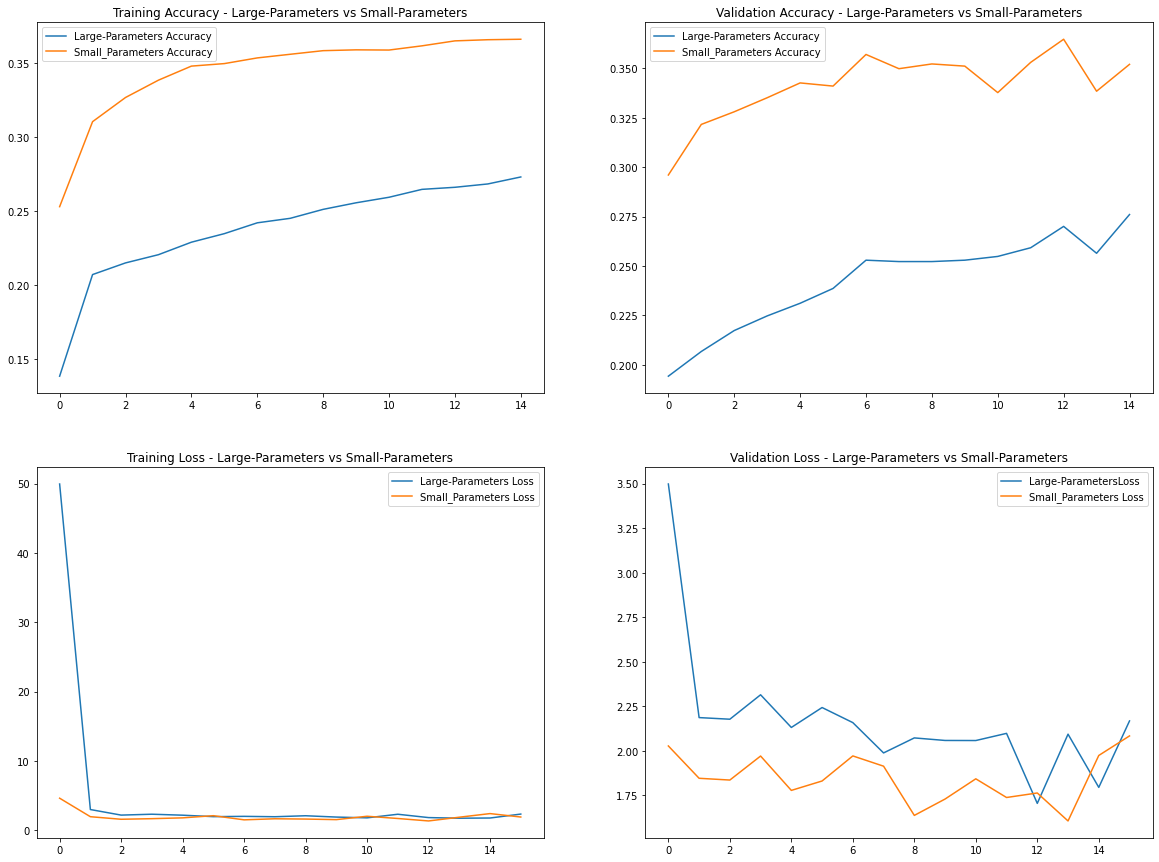

In [14]:
fig, ax = plt.subplots(2, 2, figsize=(20,15))

ax[0,0].xlabel = 'Epoch'
ax[0,0].ylabel = 'Training Accuracy'
ax[0,0].set_title("Training Accuracy - Large-Parameters vs Small-Parameters")
ax[0,0].plot(np.arange(len(accuracy_history)), accuracy_history, label='Large-Parameters Accuracy')
ax[0,0].plot(np.arange(len(accuracy_history)), accuracy_history2, label='Small_Parameters Accuracy')  
ax[0,0].legend()

ax[0,1].xlabel = 'Epoch'
ax[0,1].ylabel = 'Validation Accuracy'
ax[0,1].set_title("Validation Accuracy - Large-Parameters vs Small-Parameters")
ax[0,1].plot(np.arange(len(val_accuracy_history)), val_accuracy_history, label='Large-Parameters Accuracy')
ax[0,1].plot(np.arange(len(val_accuracy_history)), val_accuracy_history2, label='Small_Parameters Accuracy')  
ax[0,1].legend()

ax[1,0].xlabel = 'Epoch'
ax[1,0].ylabel = 'Training Loss'
ax[1,0].set_title("Training Loss - Large-Parameters vs Small-Parameters")
ax[1,0].plot(np.arange(len(loss_history)), loss_history, label='Large-Parameters Loss')
ax[1,0].plot(np.arange(len(loss_history)), loss_history2, label='Small_Parameters Loss')  
ax[1,0].legend()

ax[1,1].xlabel = 'Epoch'
ax[1,1].ylabel = 'Validation Loss'
ax[1,1].set_title("Validation Loss - Large-Parameters vs Small-Parameters")
ax[1,1].plot(np.arange(len(val_loss_history)), val_loss_history, label='Large-ParametersLoss')
ax[1,1].plot(np.arange(len(val_loss_history)), val_loss_history2, label='Small_Parameters Loss')  
ax[1,1].legend()

plt.show()

/home/alboz/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/alboz/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/alboz/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level func

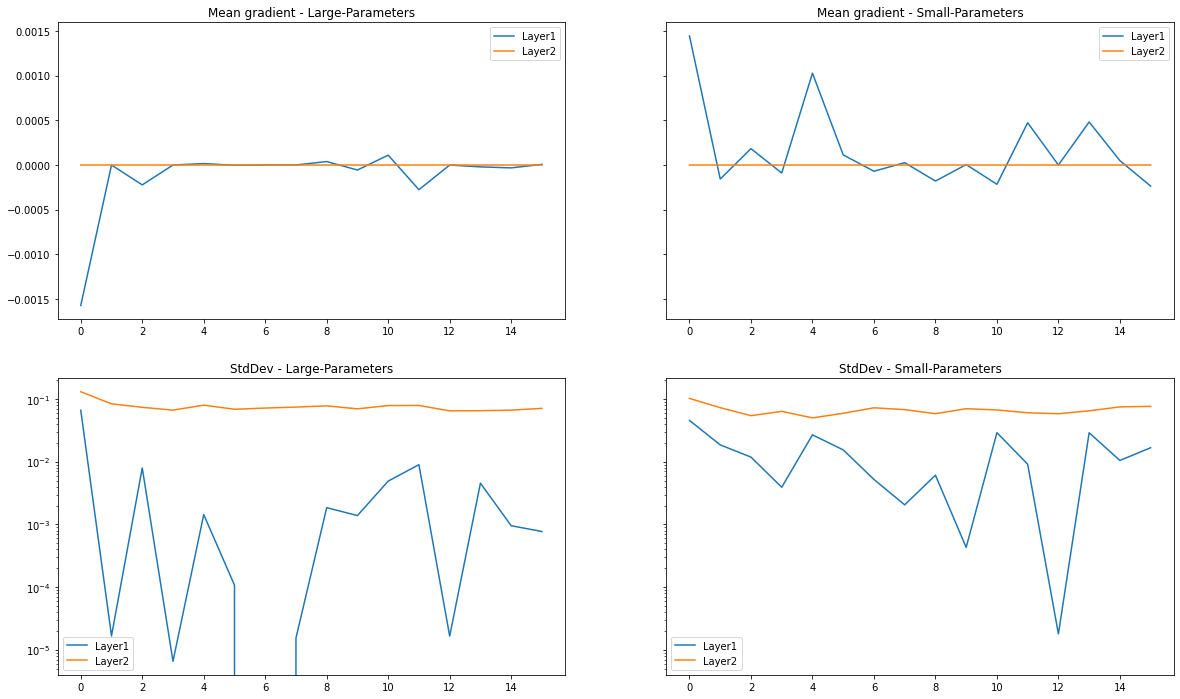

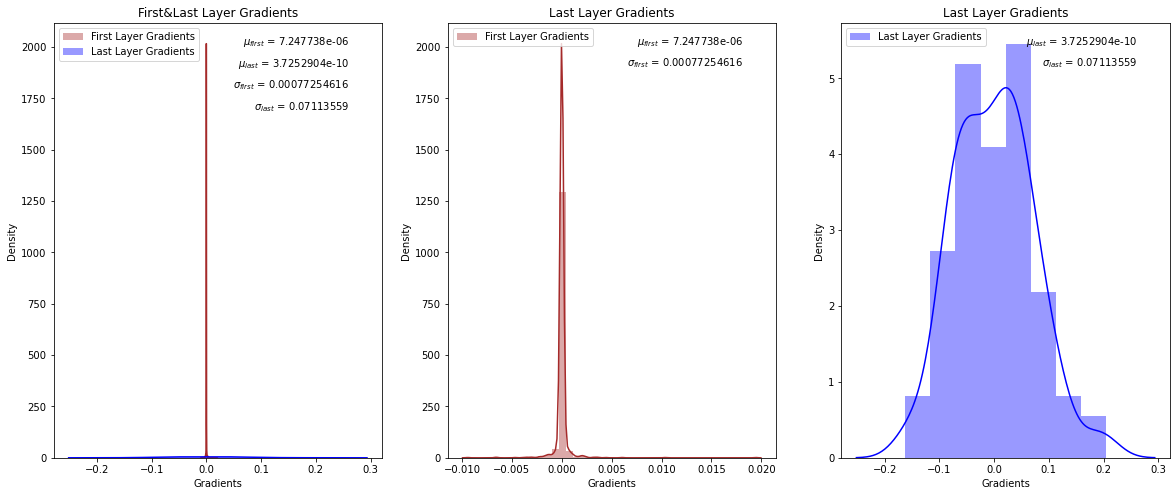

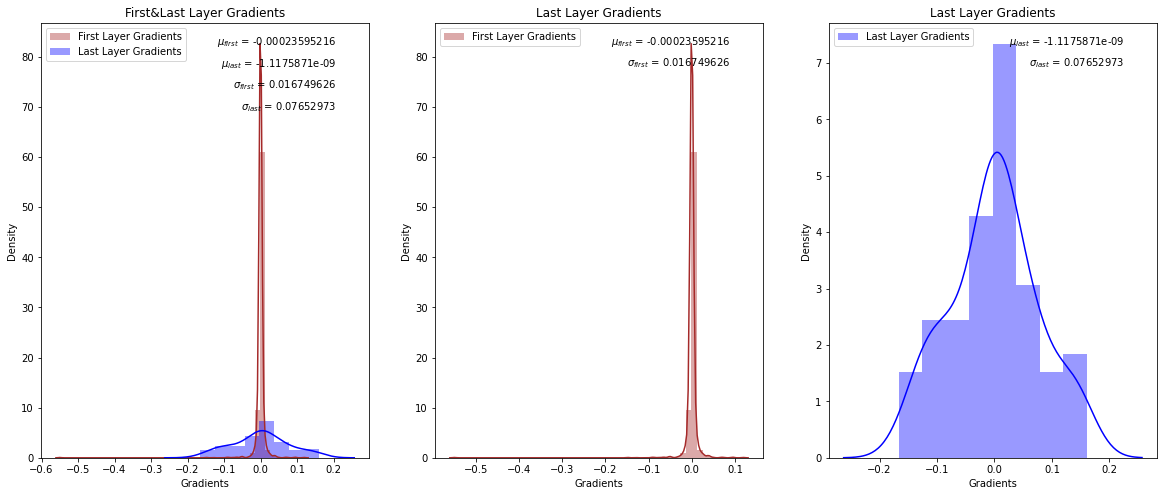

In [15]:
fig, ax = plt.subplots(2, 2, figsize=(20, 12), sharey = "row")
    
ax[0,0].set_title("Mean gradient - Large-Parameters")
for key in grad_history[0]:
    ax[0,0].plot(range(len(grad_history)), [w[key].mean() for w in grad_history], label=key)
ax[0,0].legend()

ax[1,0].set_title("StdDev - Large-Parameters")
for key in grad_history[0]:
    ax[1,0].semilogy(range(len(grad_history)), [w[key].std() for w in grad_history], label=key)
ax[1,0].legend()

ax[0,1].set_title("Mean gradient - Small-Parameters")
for key in grad_history2[0]:
    ax[0,1].plot(range(len(grad_history2)), [w[key].mean() for w in grad_history2], label=key)
ax[0,1].legend()

ax[1,1].set_title("StdDev - Small-Parameters")
for key in grad_history2[0]:
    ax[1,1].semilogy(range(len(grad_history2)), [w[key].std() for w in grad_history2], label=key)
ax[1,1].legend()


#First Layer and Last Layer Gradients' Distribution at the end of the Learning Process

visualization.plot_gradient_first_last(grad_history)
visualization.plot_gradient_first_last(grad_history2)

### 1.2 - Adding Regularization

Configuration:

* **Shallow FFNN:** to check that the large parameters is indipendent of how many layers the network has. 


* **Activation Functions:** $tanh$


* **Initialization:** 

    * $N(\omega, \mu = 0, \sigma^2 = 10)$ --> Large Parameters Regime


* **Loss:** Sparse Categorical Cross-Entropy (r = 0)


* **Learning Algorithm:** Adam --> so as to ensure the fastest convergence and isolate the issue of Large Parameters Regime.

* **Regularization:** L2 (r=0.01)

Adding regularization to see how the results change when regularization is added. Does it perform better compared to the non regularized case?

For the values used in the paper, it does not seem to be beneficial: unregularized and L2 with r = {0.01, 0.1} behave practically the same way, although it can be seen that the the standard deviation tends to become smaller the higher the value of r. 

With LASSO-regularization it performs even worse than with no regularization.


In [ ]:
# Model input shape
input_shape = (32, 32, 3)

#Hyperparameters
epochs = 15
r = 0.1
batch_size = 16
optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01)
loss= tf.keras.losses.SparseCategoricalCrossentropy()
metric = tf.keras.metrics.SparseCategoricalAccuracy()


model = models.make_MLPnet(activation = 'tanh',
                  predicter = 'softmax', 
                  initializer = tf.keras.initializers.RandomNormal(0,10,seed=1),
                  #initializer = tf.keras.initializers.GlorotUniform(seed = 1),
                  name = 'Layer', 
                  n_hidden=1, 
                  units = 8,
                  regularization_type='l2', 
                  regularization_value=r)

grad_history3, loss_history3, accuracy_history3, val_loss_history3, val_accuracy_history3, time3 = training.train_model(x_train_mlp, y_train, x_test_mlp, y_test,  model, epochs, optimizer, loss, metric, batch_size)

In [ ]:
# Model input shape
input_shape = (32, 32, 3)

#Hyperparameters
epochs = 15
r = 0.01
batch_size = 16
optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01)
loss= tf.keras.losses.SparseCategoricalCrossentropy()
metric = tf.keras.metrics.SparseCategoricalAccuracy()


model = models.make_MLPnet(activation = 'tanh',
                  predicter = 'softmax', 
                  initializer = tf.keras.initializers.RandomNormal(0,10,seed=1),
                  #initializer = tf.keras.initializers.GlorotUniform(seed = 1),
                  name = 'Layer', 
                  n_hidden=1, 
                  units = 8,
                  regularization_type='l1', 
                  regularization_value=r)

grad_history4, loss_history4, accuracy_history4, val_loss_history4, val_accuracy_history4, time4 = training.train_model(x_train_mlp, y_train, x_test_mlp, y_test,  model, epochs, optimizer, loss, metric, batch_size)

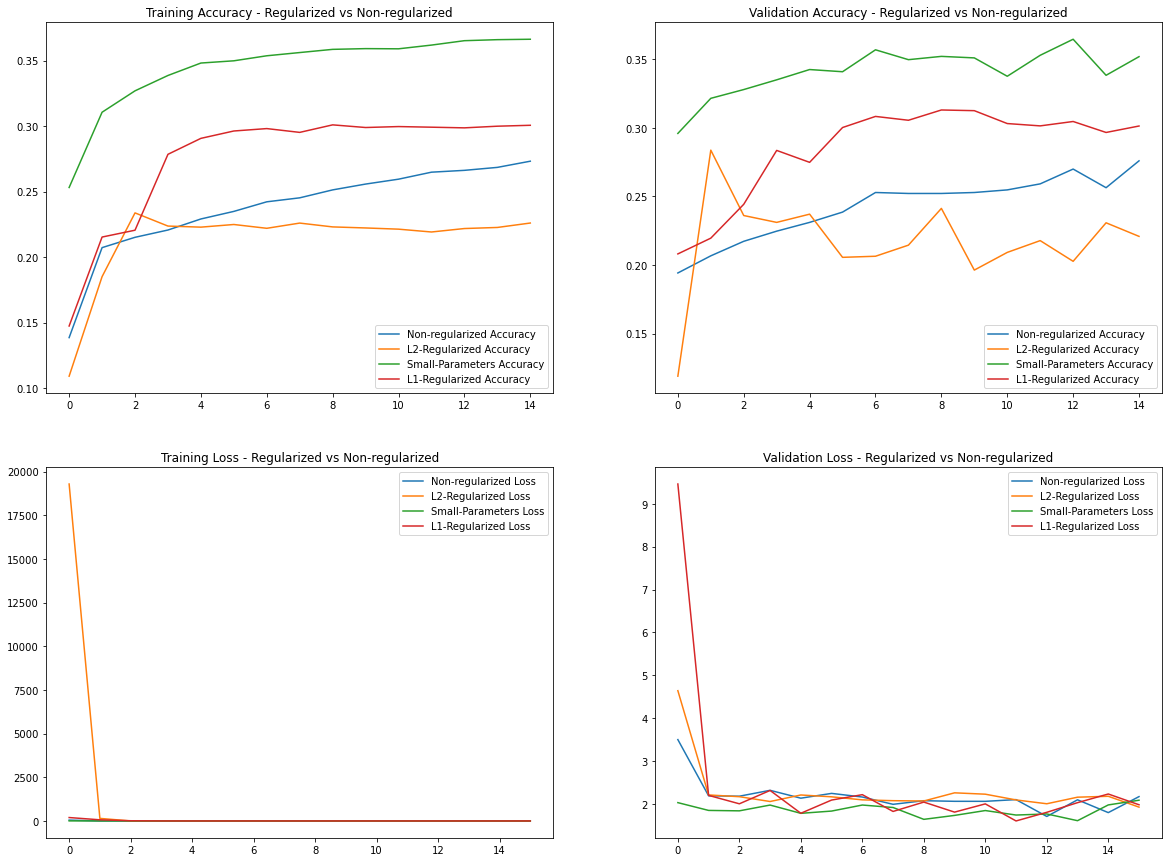

In [18]:
fig, ax = plt.subplots(2, 2, figsize=(20,15))

ax[0,0].xlabel = 'Epoch'
ax[0,0].ylabel = 'Training Accuracy'
ax[0,0].set_title("Training Accuracy - Regularized vs Non-regularized")
ax[0,0].plot(np.arange(len(accuracy_history)), accuracy_history, label='Non-regularized Accuracy')
ax[0,0].plot(np.arange(len(accuracy_history3)), accuracy_history3, label='L2-Regularized Accuracy')
ax[0,0].plot(np.arange(len(accuracy_history2)), accuracy_history2, label='Small-Parameters Accuracy') 
ax[0,0].plot(np.arange(len(accuracy_history4)), accuracy_history4, label='L1-Regularized Accuracy') 
ax[0,0].legend()

ax[0,1].xlabel = 'Epoch'
ax[0,1].ylabel = 'Validation Accuracy'
ax[0,1].set_title("Validation Accuracy - Regularized vs Non-regularized")
ax[0,1].plot(np.arange(len(val_accuracy_history)), val_accuracy_history, label='Non-regularized Accuracy')
ax[0,1].plot(np.arange(len(val_accuracy_history3)), val_accuracy_history3, label='L2-Regularized Accuracy')
ax[0,1].plot(np.arange(len(val_accuracy_history2)), val_accuracy_history2, label='Small-Parameters Accuracy')  
ax[0,1].plot(np.arange(len(val_accuracy_history4)), val_accuracy_history4, label='L1-Regularized Accuracy')
ax[0,1].legend()

ax[1,0].xlabel = 'Epoch'
ax[1,0].ylabel = 'Training Loss'
ax[1,0].set_title("Training Loss - Regularized vs Non-regularized")
ax[1,0].plot(np.arange(len(loss_history)), loss_history, label='Non-regularized Loss')
ax[1,0].plot(np.arange(len(loss_history3)), loss_history3, label='L2-Regularized Loss')
ax[1,0].plot(np.arange(len(loss_history)), loss_history2, label='Small-Parameters Loss')  
ax[1,0].plot(np.arange(len(loss_history4)), loss_history4, label='L1-Regularized Loss')
ax[1,0].legend()

ax[1,1].xlabel = 'Epoch'
ax[1,1].ylabel = 'Validation Loss'
ax[1,1].set_title("Validation Loss - Regularized vs Non-regularized")
ax[1,1].plot(np.arange(len(val_loss_history)), val_loss_history, label='Non-regularized Loss')
ax[1,1].plot(np.arange(len(val_loss_history3)), val_loss_history3, label='L2-Regularized Loss')
ax[1,1].plot(np.arange(len(val_loss_history)), val_loss_history2, label='Small-Parameters Loss')
ax[1,1].plot(np.arange(len(val_loss_history4)), val_loss_history4, label='L1-Regularized Loss')
ax[1,1].legend()

plt.show()

/home/alboz/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/alboz/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/alboz/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level func

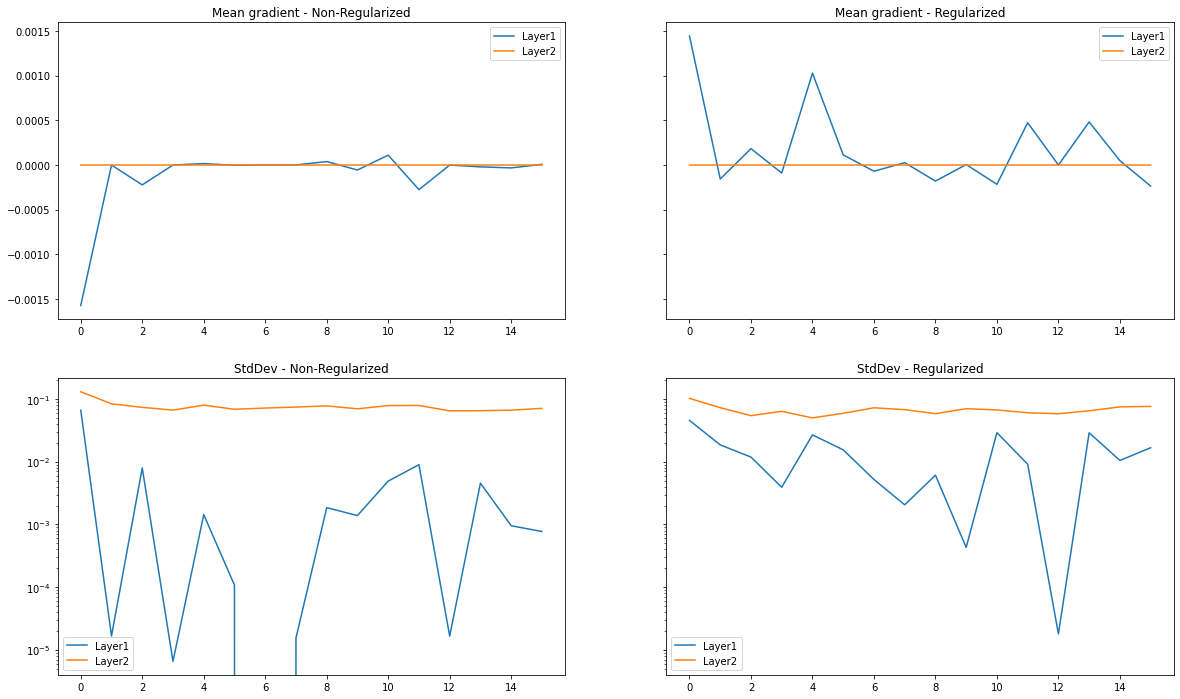

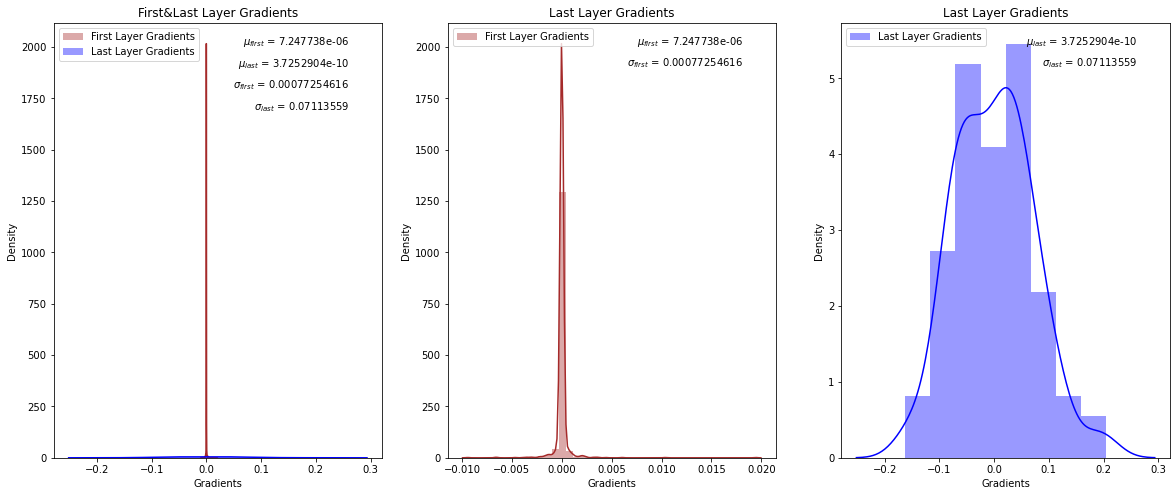

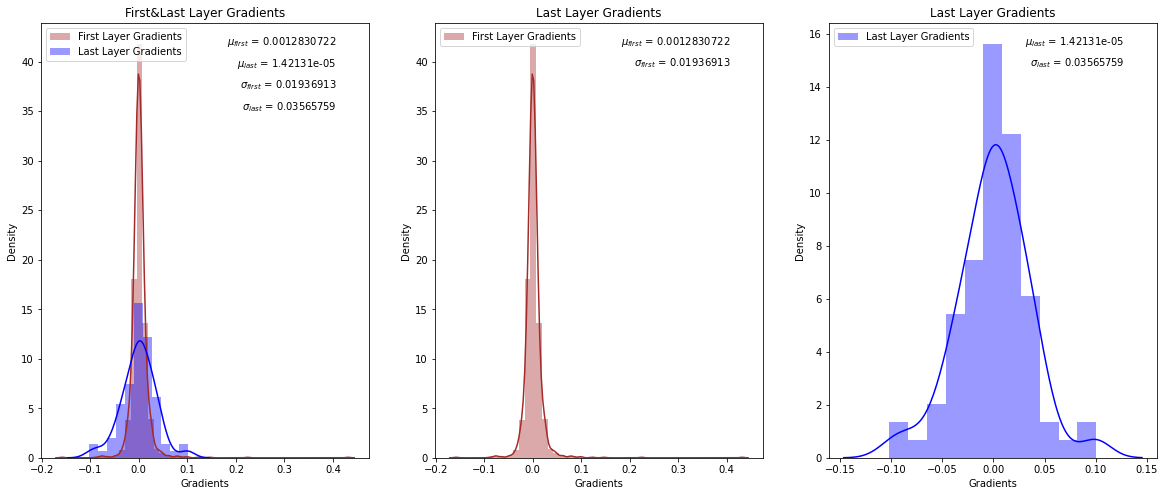

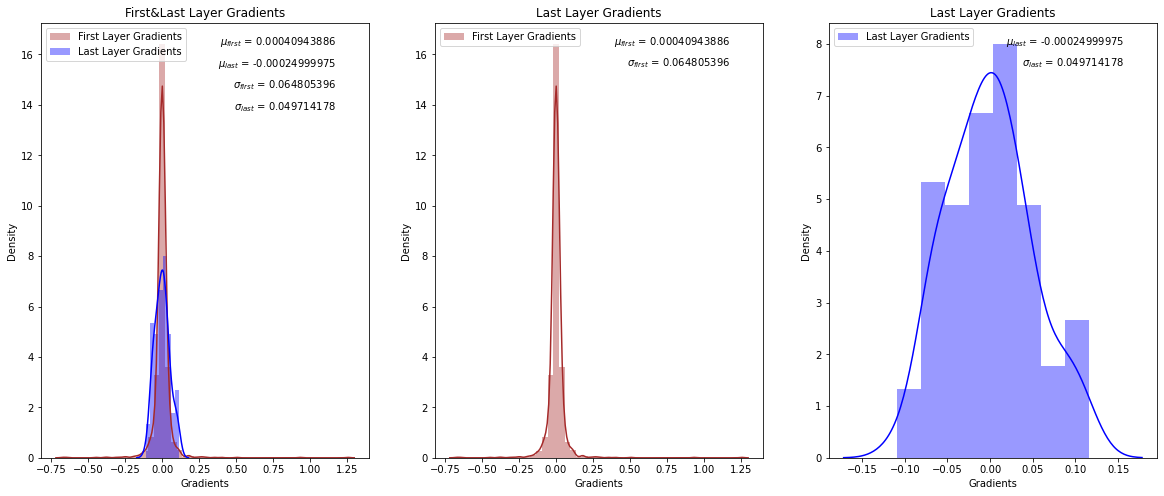

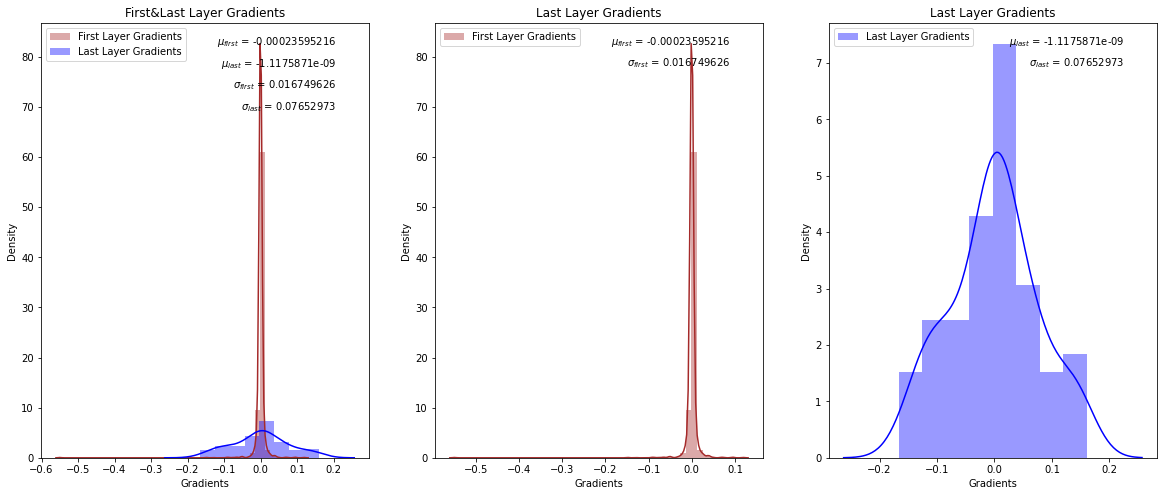

In [19]:
fig, ax = plt.subplots(2, 2, figsize=(20, 12), sharey="row")
    
ax[0,0].set_title("Mean gradient - Non-Regularized")
for key in grad_history[0]:
    ax[0,0].plot(range(len(grad_history)), [w[key].mean() for w in grad_history], label=key)
ax[0,0].legend()

ax[1,0].set_title("StdDev - Non-Regularized")
for key in grad_history[0]:
    ax[1,0].semilogy(range(len(grad_history)), [w[key].std() for w in grad_history], label=key)
ax[1,0].legend()

ax[0,1].set_title("Mean gradient - Regularized")
for key in grad_history2[0]:
    ax[0,1].plot(range(len(grad_history3)), [w[key].mean() for w in grad_history2], label=key)
ax[0,1].legend()

ax[1,1].set_title("StdDev - Regularized")
for key in grad_history2[0]:
    ax[1,1].semilogy(range(len(grad_history3)), [w[key].std() for w in grad_history2], label=key)
ax[1,1].legend()


#First Layer and Last Layer Gradients' Distribution at the end of the Learning Process

visualization.plot_gradient_first_last(grad_history)
visualization.plot_gradient_first_last(grad_history3)
visualization.plot_gradient_first_last(grad_history4)
visualization.plot_gradient_first_last(grad_history2)

### 1.3 - Finding the best Regularization parameter

Since Regularization seems not to be working with the current values of $r$, let's see for which value it performs best and see whether there is, actually, a regularization regime in which the vanishing gradient issue is fixed.

**Results:** in a very wide range of regularization parameters $ r\in[10^{-3},10^2] $, not a single value performs as expected. It does not even much too much which value is used, they all perform just as the unregularized case.

In [20]:
# Model input shape
input_shape = (32, 32, 3)

#Hyperparameters
epochs = 15
#r = 0.01
batch_size = 16
optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01)
loss = tf.keras.losses.SparseCategoricalCrossentropy()
metric = tf.keras.metrics.SparseCategoricalAccuracy()

grad_history_l2 = []
loss_history_l2 =  [] 
accuracy_history_l2 = [] 
val_loss_history_l2 = [] 
val_accuracy_history_l2 = [] 

grad_history_l1 = []
loss_history_l1 =  [] 
accuracy_history_l1 = [] 
val_loss_history_l1 = [] 
val_accuracy_history_l1 = [] 

In [ ]:
reg = np.logspace(-3, 2, 10)
print('--- Initializing Regularization Loop ---')
index = 0
for r in reg:
    print('r = ', r, '------- #',index+1 , 'of', len(reg))
    model = models.make_MLPnet(input_shape=input_shape,
                               activation = 'tanh',
                               predicter = 'softmax', 
                               initializer = tf.keras.initializers.RandomNormal(0,10,seed=1),
                               #initializer = tf.keras.initializers.GlorotUniform(seed = 1),
                               name = 'Layer', 
                               n_hidden=1, 
                               units = 8,
                               regularization_type='l2', 
                               regularization_value=r)
    
    model2 = models.make_MLPnet(input_shape=input_shape,
                                activation = 'tanh',
                                predicter = 'softmax', 
                                initializer = tf.keras.initializers.RandomNormal(0,10,seed=1),
                                #initializer = tf.keras.initializers.GlorotUniform(seed = 1),
                                name = 'Layer', 
                                n_hidden=1, 
                                units = 8,
                                regularization_type='l1', 
                                regularization_value=r)
    
    grad, train_loss, train_accuracy, val_loss, val_accuracy, time = training.train_model(x_train_mlp, y_train, x_test_mlp, y_test,  model, epochs, optimizer, loss, metric, batch_size)
    grad_history_l2.append(grad)
    loss_history_l2.append(train_loss)
    accuracy_history_l2.append(train_accuracy)
    val_loss_history_l2.append(val_loss) 
    val_accuracy_history_l2.append(val_accuracy)
    

    grad, train_loss, train_accuracy, val_loss, val_accuracy, time = training.train_model(x_train_mlp, y_train, x_test_mlp, y_test,  model2, epochs, optimizer, loss, metric, batch_size)
    grad_history_l1.append(grad)
    loss_history_l1.append(train_loss)
    accuracy_history_l1.append(train_accuracy)
    val_loss_history_l1.append(val_loss) 
    val_accuracy_history_l1.append(val_accuracy)
    index+=1

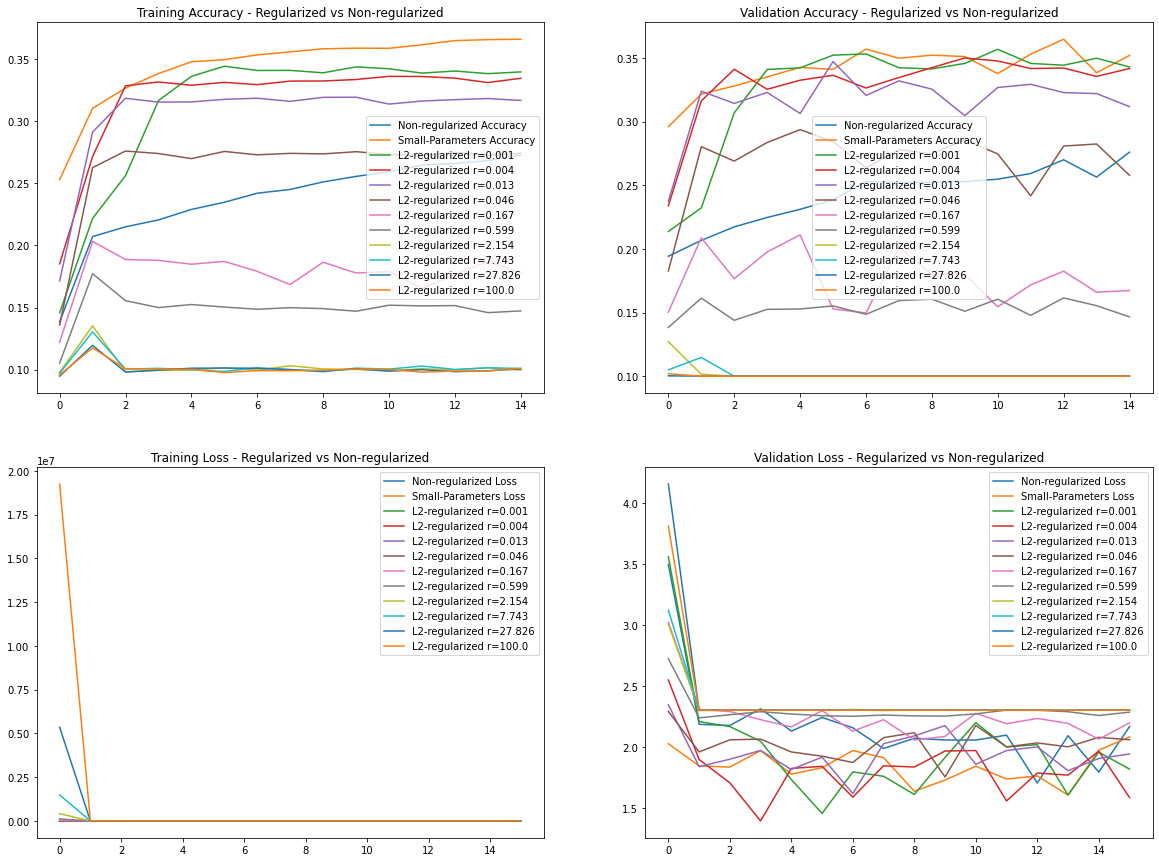

In [22]:
#L2
fig, ax = plt.subplots(2, 2, figsize=(20,15))

ax[0,0].xlabel = 'Epoch'
ax[0,0].ylabel = 'Training Accuracy'
ax[0,0].set_title("Training Accuracy - Regularized vs Non-regularized")
ax[0,0].plot(np.arange(len(accuracy_history)), accuracy_history, label='Non-regularized Accuracy')
ax[0,0].plot(np.arange(len(accuracy_history2)), accuracy_history2, label='Small-Parameters Accuracy')  
i=0
for r in reg:
    ax[0,0].plot(np.arange(len(accuracy_history_l2[i])), accuracy_history_l2[i], label='L2-regularized r='+str(round(r, 3))) 
    i+=1
ax[0,0].legend()

ax[0,1].xlabel = 'Epoch'
ax[0,1].ylabel = 'Validation Accuracy'
ax[0,1].set_title("Validation Accuracy - Regularized vs Non-regularized")
ax[0,1].plot(np.arange(len(val_accuracy_history)), val_accuracy_history, label='Non-regularized Accuracy')
ax[0,1].plot(np.arange(len(val_accuracy_history2)), val_accuracy_history2, label='Small-Parameters Accuracy') 
i=0
for r in reg:
    ax[0,1].plot(np.arange(len(val_accuracy_history_l2[i])), val_accuracy_history_l2[i], label='L2-regularized r='+str(round(r, 3))) 
    i+=1
ax[0,1].legend()

ax[1,0].xlabel = 'Epoch'
ax[1,0].ylabel = 'Training Loss'
ax[1,0].set_title("Training Loss - Regularized vs Non-regularized")
ax[1,0].plot(np.arange(len(loss_history)), loss_history, label='Non-regularized Loss')
ax[1,0].plot(np.arange(len(loss_history)), loss_history2, label='Small-Parameters Loss')  
i=0
for r in reg:
    ax[1,0].plot(np.arange(len(loss_history_l2[i])), loss_history_l2[i], label='L2-regularized r='+str(round(r, 3))) 
    i+=1
ax[1,0].legend()

ax[1,1].xlabel = 'Epoch'
ax[1,1].ylabel = 'Validation Loss'
ax[1,1].set_title("Validation Loss - Regularized vs Non-regularized")
ax[1,1].plot(np.arange(len(val_loss_history)), val_loss_history, label='Non-regularized Loss')
ax[1,1].plot(np.arange(len(val_loss_history)), val_loss_history2, label='Small-Parameters Loss')
i=0
for r in reg:
    ax[1,1].plot(np.arange(len(val_loss_history_l2[i])), val_loss_history_l2[i], label='L2-regularized r='+str(round(r, 3))) 
    i+=1
ax[1,1].legend()

plt.show()

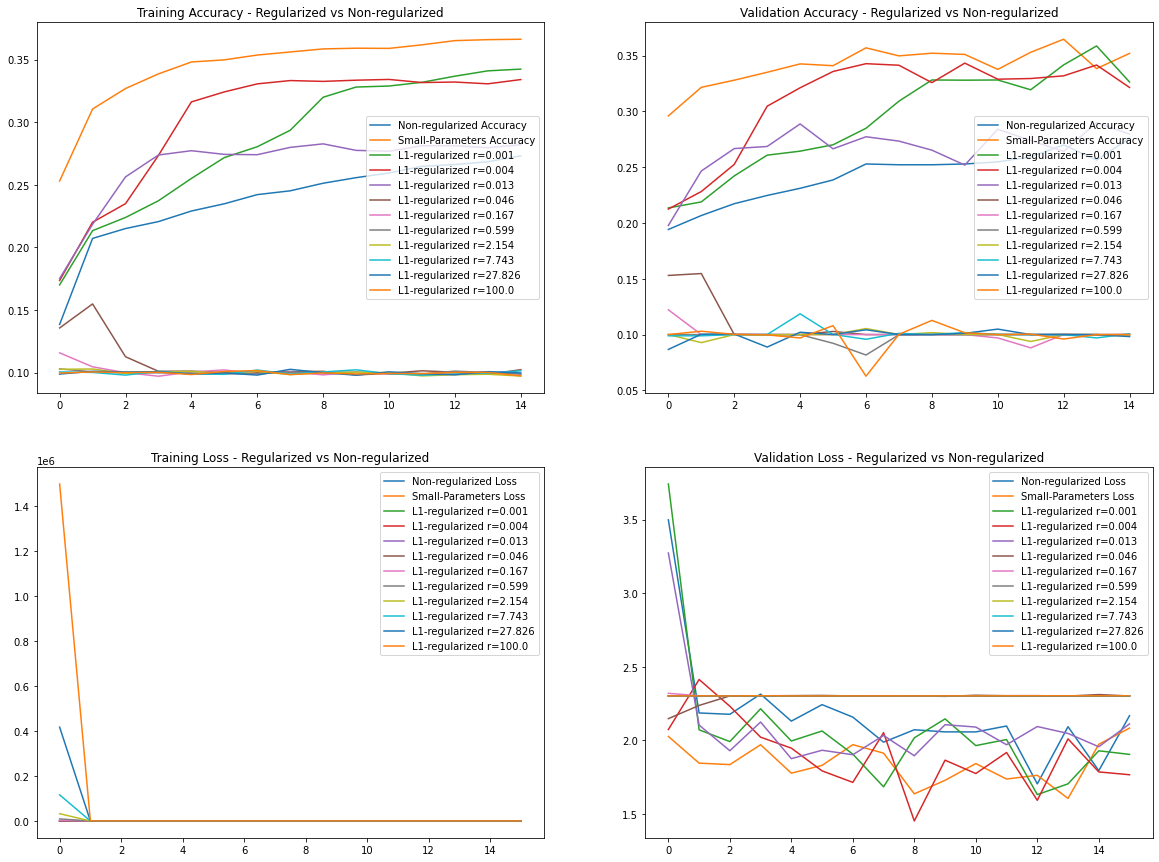

In [23]:
#L1
fig, ax = plt.subplots(2, 2, figsize=(20,15))

ax[0,0].xlabel = 'Epoch'
ax[0,0].ylabel = 'Training Accuracy'
ax[0,0].set_title("Training Accuracy - Regularized vs Non-regularized")
ax[0,0].plot(np.arange(len(accuracy_history)), accuracy_history, label='Non-regularized Accuracy')
ax[0,0].plot(np.arange(len(accuracy_history2)), accuracy_history2, label='Small-Parameters Accuracy')  
i=0
for r in reg:
    ax[0,0].plot(np.arange(len(accuracy_history_l1[i])), accuracy_history_l1[i], label='L1-regularized r='+str(round(r, 3))) 
    i+=1
ax[0,0].legend()

ax[0,1].xlabel = 'Epoch'
ax[0,1].ylabel = 'Validation Accuracy'
ax[0,1].set_title("Validation Accuracy - Regularized vs Non-regularized")
ax[0,1].plot(np.arange(len(val_accuracy_history)), val_accuracy_history, label='Non-regularized Accuracy')
ax[0,1].plot(np.arange(len(val_accuracy_history2)), val_accuracy_history2, label='Small-Parameters Accuracy') 
i=0
for r in reg:
    ax[0,1].plot(np.arange(len(val_accuracy_history_l1[i])), val_accuracy_history_l1[i], label='L1-regularized r='+str(round(r, 3))) 
    i+=1
ax[0,1].legend()

ax[1,0].xlabel = 'Epoch'
ax[1,0].ylabel = 'Training Loss'
ax[1,0].set_title("Training Loss - Regularized vs Non-regularized")
ax[1,0].plot(np.arange(len(loss_history)), loss_history, label='Non-regularized Loss')
ax[1,0].plot(np.arange(len(loss_history)), loss_history2, label='Small-Parameters Loss')  
i=0
for r in reg:
    ax[1,0].plot(np.arange(len(loss_history_l1[i])), loss_history_l1[i], label='L1-regularized r='+str(round(r, 3))) 
    i+=1
ax[1,0].legend()

ax[1,1].xlabel = 'Epoch'
ax[1,1].ylabel = 'Validation Loss'
ax[1,1].set_title("Validation Loss - Regularized vs Non-regularized")
ax[1,1].plot(np.arange(len(val_loss_history)), val_loss_history, label='Non-regularized Loss')
ax[1,1].plot(np.arange(len(val_loss_history)), val_loss_history2, label='Small-Parameters Loss')
i=0
for r in reg:
    ax[1,1].plot(np.arange(len(val_loss_history_l1[i])), val_loss_history_l1[i], label='L1-regularized r='+str(round(r, 3))) 
    i+=1
ax[1,1].legend()

plt.show()

### 1.4 - Super-large Parameters Regime

Configuration:

* **Shallow FFNN:** to check that the large parameters is indipendent of how many layers the network has. 


* **Activation Functions:** $tanh$


* **Initialization:** $N(\omega, \mu = 0, \sigma^2 = 20)$ --> Very Large Parameters Regime


* **Loss:** Sparse Categorical Cross-Entropy


* **Learning Algorithm:** Adam --> so as to ensure the fastest convergence and isolate the issue of Large Parameters Regime.

**RESULTS:** Nothing changes. Again, the unregularized seems to be perform even slightly better than the regularized model.

In [ ]:
# Model input shape
input_shape = (32, 32, 3)

#Hyperparameters
epochs = 20
r = 0.0
batch_size = 16
optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01)
loss= tf.keras.losses.SparseCategoricalCrossentropy()
metric = tf.keras.metrics.SparseCategoricalAccuracy()


model = models.make_MLPnet(activation = 'tanh',
                  predicter = 'softmax', 
                  initializer = tf.keras.initializers.RandomNormal(0,20,seed=1),
                  #initializer = tf.keras.initializers.GlorotUniform(seed = 1),
                  name = 'Layer', 
                  n_hidden=1, 
                  units = 8,
                  regularization_type='l2', 
                  regularization_value=r)

grad_history5, loss_history5, accuracy_history5, val_loss_history5, val_accuracy_history5, time5 = training.train_model(x_train_mlp, y_train, x_test_mlp, y_test,  model, epochs, optimizer, loss, metric, batch_size)

In [ ]:
# Model input shape
input_shape = (32, 32, 3)

#Hyperparameters
epochs = 20
r = 0.1
batch_size = 16
optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01)
loss= tf.keras.losses.SparseCategoricalCrossentropy()
metric = tf.keras.metrics.SparseCategoricalAccuracy()


model = models.make_MLPnet(input_shape=input_shape,
                           activation = 'tanh',
                           predicter = 'softmax', 
                           initializer = tf.keras.initializers.RandomNormal(0,20,seed=1),
                           #initializer = tf.keras.initializers.GlorotUniform(seed = 1),
                           name = 'Layer', 
                           n_hidden=1, 
                           units = 8,
                           regularization_type='l2', 
                           regularization_value=r)

grad_history6, loss_history6, accuracy_history6, val_loss_history6, val_accuracy_history6, time6 = training.train_model(x_train_mlp, y_train, x_test_mlp, y_test,  model, epochs, optimizer, loss, metric, batch_size)

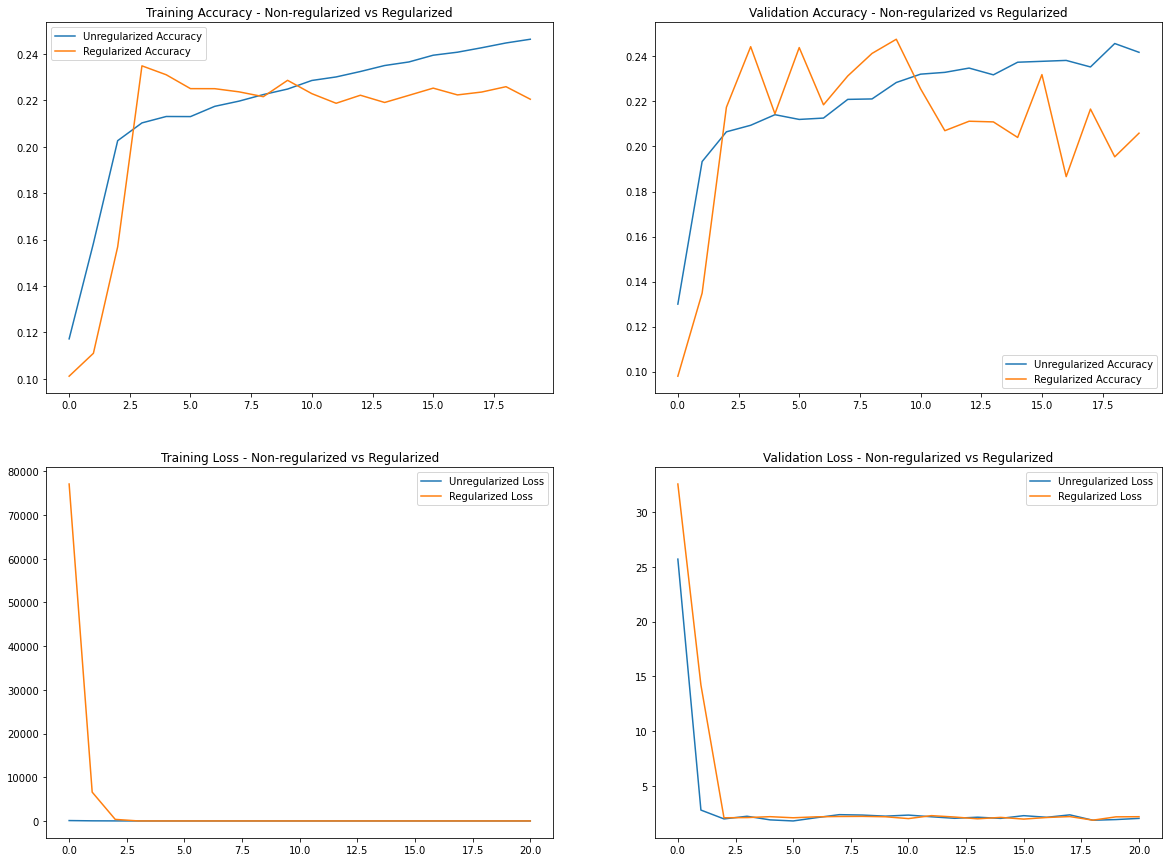

In [26]:
fig, ax = plt.subplots(2, 2, figsize=(20,15))

ax[0,0].xlabel = 'Epoch'
ax[0,0].ylabel = 'Training Accuracy'
ax[0,0].set_title("Training Accuracy - Non-regularized vs Regularized")
ax[0,0].plot(np.arange(len(accuracy_history5)), accuracy_history5, label='Unregularized Accuracy')
ax[0,0].plot(np.arange(len(accuracy_history6)), accuracy_history6, label='Regularized Accuracy')  
ax[0,0].legend()

ax[0,1].xlabel = 'Epoch'
ax[0,1].ylabel = 'Validation Accuracy'
ax[0,1].set_title("Validation Accuracy - Non-regularized vs Regularized")
ax[0,1].plot(np.arange(len(val_accuracy_history5)), val_accuracy_history5, label='Unregularized Accuracy')
ax[0,1].plot(np.arange(len(val_accuracy_history6)), val_accuracy_history6, label='Regularized Accuracy')  
ax[0,1].legend()

ax[1,0].xlabel = 'Epoch'
ax[1,0].ylabel = 'Training Loss'
ax[1,0].set_title("Training Loss - Non-regularized vs Regularized")
ax[1,0].plot(np.arange(len(loss_history5)), loss_history5, label='Unregularized Loss')
ax[1,0].plot(np.arange(len(loss_history6)), loss_history6, label='Regularized Loss')  
ax[1,0].legend()

ax[1,1].xlabel = 'Epoch'
ax[1,1].ylabel = 'Validation Loss'
ax[1,1].set_title("Validation Loss - Non-regularized vs Regularized")
ax[1,1].plot(np.arange(len(val_loss_history5)), val_loss_history5, label='Unregularized Loss')
ax[1,1].plot(np.arange(len(val_loss_history6)), val_loss_history6, label='Regularized Loss')  
ax[1,1].legend()

plt.show()

/home/alboz/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/alboz/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/alboz/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level func

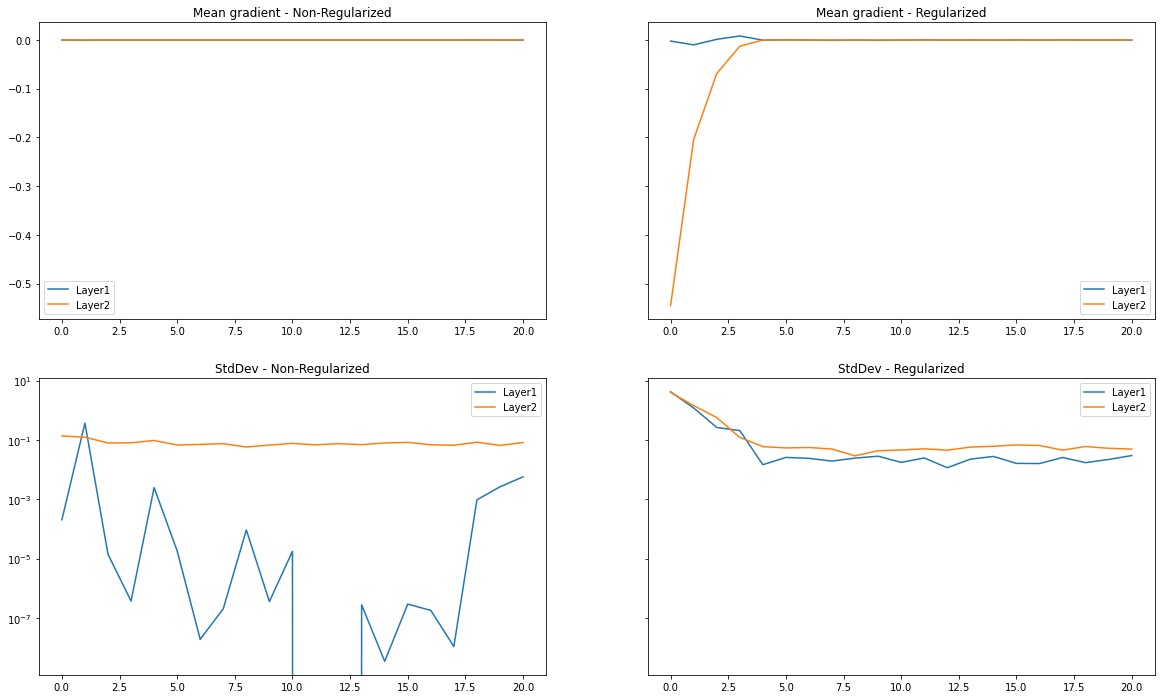

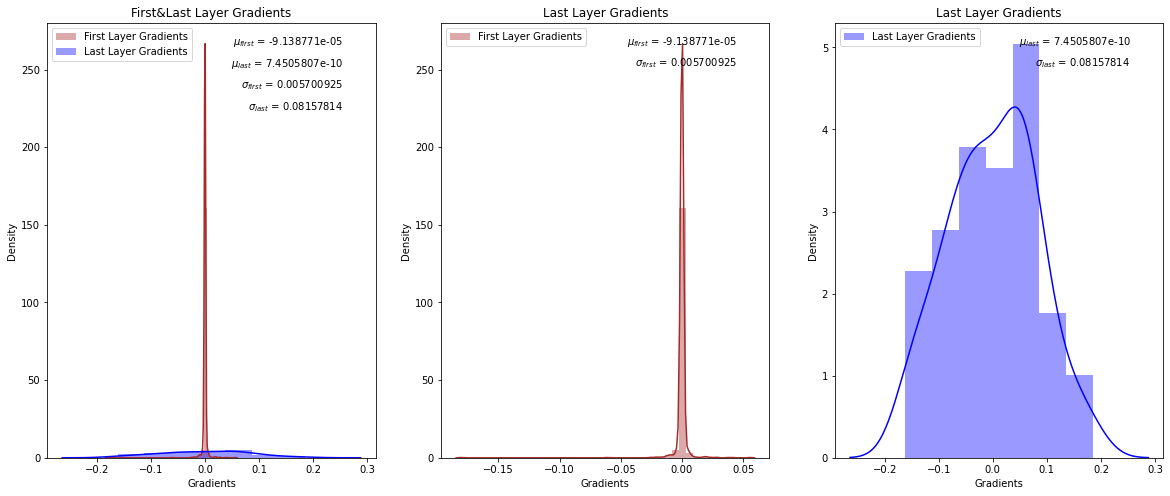

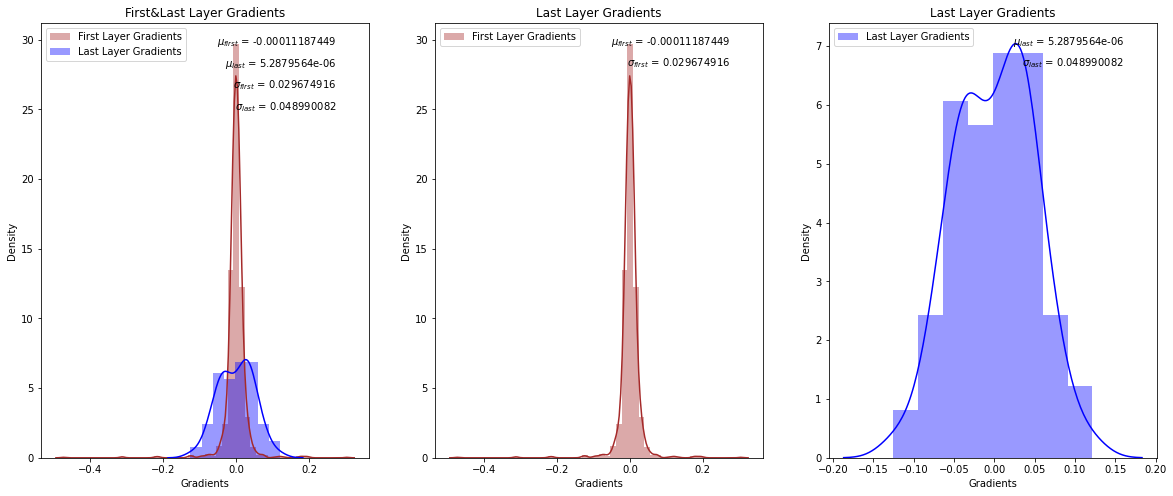

In [27]:
fig, ax = plt.subplots(2, 2, figsize=(20, 12), sharey="row")
    
ax[0,0].set_title("Mean gradient - Non-Regularized")
for key in grad_history5[0]:
    ax[0,0].plot(range(len(grad_history5)), [w[key].mean() for w in grad_history5], label=key)
ax[0,0].legend()

ax[1,0].set_title("StdDev - Non-Regularized")
for key in grad_history5[0]:
    ax[1,0].semilogy(range(len(grad_history5)), [w[key].std() for w in grad_history5], label=key)
ax[1,0].legend()

ax[0,1].set_title("Mean gradient - Regularized")
for key in grad_history6[0]:
    ax[0,1].plot(range(len(grad_history6)), [w[key].mean() for w in grad_history6], label=key)
ax[0,1].legend()

ax[1,1].set_title("StdDev - Regularized")
for key in grad_history6[0]:
    ax[1,1].semilogy(range(len(grad_history6)), [w[key].std() for w in grad_history6], label=key)
ax[1,1].legend()


#First Layer and Last Layer Gradients' Distribution at the end of the Learning Process

visualization.plot_gradient_first_last(grad_history5)
visualization.plot_gradient_first_last(grad_history6)


### 1.5 - Uniform Large-Parameters Regime

Configuration:

* **Shallow FFNN:** to check that the large parameters is indipendent of how many layers the network has. 


* **Activation Functions:** $tanh$


* **Initialization:** $Uniform(-10,10)$ --> Very Large Parameters Regime


* **Loss:** Sparse Categorical Cross-Entropy


* **Learning Algorithm:** Adam --> so as to ensure the fastest convergence and isolate the issue of Large Parameters Regime.

**RESULTS:** 

In [ ]:
#UnRegularized Uniform - Large Parameters Regime

# Model input shape
input_shape = (32, 32, 3)

#Hyperparameters
epochs = 15
r = 0.0
batch_size = 16
optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01)
loss= tf.keras.losses.SparseCategoricalCrossentropy()
metric = tf.keras.metrics.SparseCategoricalAccuracy()


model = models.make_MLPnet(input_shape=input_shape,
                           activation = 'tanh',
                           predicter = 'softmax', 
                           initializer = tf.keras.initializers.RandomUniform(-10,10,seed=1),
                           #initializer = tf.keras.initializers.GlorotUniform(seed = 1),
                           name = 'Layer', 
                           n_hidden=1, 
                           units = 8,
                           regularization_type='l2', 
                           regularization_value=r)

grad_history7, loss_history7, accuracy_history7, val_loss_history7, val_accuracy_history7, time7 = training.train_model(x_train_mlp, y_train, x_test_mlp, y_test,  model, epochs, optimizer, loss, metric, batch_size)

In [ ]:
#L2-Regularized Uniform - Large Parameters Regime

# Model input shape
input_shape = (32, 32, 3)

#Hyperparameters
epochs = 15
r = 0.1
batch_size = 16
optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01)
loss= tf.keras.losses.SparseCategoricalCrossentropy()
metric = tf.keras.metrics.SparseCategoricalAccuracy()


model = models.make_MLPnet(input_shape=input_shape,
                           activation = 'tanh',
                           predicter = 'softmax', 
                           initializer = tf.keras.initializers.RandomUniform(-10,10,seed=1),
                           #initializer = tf.keras.initializers.GlorotUniform(seed = 1),
                           name = 'Layer', 
                           type='mlp',
                           n_hidden=1, 
                           units = 8,
                           regularization_type='l2', 
                           regularization_value=r)

grad_history8, loss_history8, accuracy_history8, val_loss_history8, val_accuracy_history8, time8 = training.train_model(x_train_mlp, y_train, x_test_mlp, y_test,  model, epochs, optimizer, loss, metric, batch_size)

In [ ]:
#L1-Regularized Uniform - Large Parameters Regime

# Model input shape
input_shape = (32, 32, 3)

#Hyperparameters
epochs = 15
r = 0.1
batch_size = 16
optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01)
loss= tf.keras.losses.SparseCategoricalCrossentropy()
metric = tf.keras.metrics.SparseCategoricalAccuracy()


model = models.make_MLPnet(input_shape=input_shape,
                           activation = 'tanh',
                           predicter = 'softmax', 
                           initializer = tf.keras.initializers.RandomUniform(-10,10,seed=1),
                           #initializer = tf.keras.initializers.GlorotUniform(seed = 1),
                           name = 'Layer', 
                           n_hidden=1, 
                           units = 8,
                           regularization_type='l1', 
                           regularization_value=r)

grad_history9, loss_history9, accuracy_history9, val_loss_history9, val_accuracy_history9, time9 = training.train_model(x_train_mlp, y_train, x_test_mlp, y_test,  model, epochs, optimizer, loss, metric, batch_size)

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(20,15))

ax[0,0].xlabel = 'Epoch'
ax[0,0].ylabel = 'Training Accuracy'
ax[0,0].set_title("Training Accuracy - Non-regularized vs Regularized")
ax[0,0].plot(np.arange(len(accuracy_history7)), accuracy_history7, label='Unregularized Accuracy')
ax[0,0].plot(np.arange(len(accuracy_history8)), accuracy_history8, label='L2-Regularized Accuracy') 
ax[0,0].plot(np.arange(len(accuracy_history9)), accuracy_history9, label='L1-Regularized Accuracy')  
ax[0,0].legend()

ax[0,1].xlabel = 'Epoch'
ax[0,1].ylabel = 'Validation Accuracy'
ax[0,1].set_title("Validation Accuracy - Non-regularized vs Regularized")
ax[0,1].plot(np.arange(len(val_accuracy_history7)), val_accuracy_history7, label='Unregularized Accuracy')
ax[0,1].plot(np.arange(len(val_accuracy_history8)), val_accuracy_history8, label='L2-Regularized Accuracy')
ax[0,1].plot(np.arange(len(val_accuracy_history9)), val_accuracy_history9, label='L1-Regularized Accuracy')
ax[0,1].legend()

ax[1,0].xlabel = 'Epoch'
ax[1,0].ylabel = 'Training Loss'
ax[1,0].set_title("Training Loss - Non-regularized vs Regularized")
ax[1,0].plot(np.arange(len(loss_history7)), loss_history7, label='Unregularized Loss')
ax[1,0].plot(np.arange(len(loss_history8)), loss_history8, label='L2-Regularized Loss') 
ax[1,0].plot(np.arange(len(loss_history9)), loss_history9, label='L1-Regularized Loss')  
ax[1,0].legend()

ax[1,1].xlabel = 'Epoch'
ax[1,1].ylabel = 'Validation Loss'
ax[1,1].set_title("Validation Loss - Non-regularized vs Regularized")
ax[1,1].plot(np.arange(len(val_loss_history7)), val_loss_history7, label='Unregularized Loss')
ax[1,1].plot(np.arange(len(val_loss_history8)), val_loss_history8, label='L2-Regularized Loss')  
ax[1,1].plot(np.arange(len(val_loss_history9)), val_loss_history9, label='L1-Regularized Loss') 
ax[1,1].legend()

plt.show()

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(20, 12), sharey="row")
    
ax[0,0].set_title("Mean gradient - Non-Regularized")
for key in grad_history7[0]:
    ax[0,0].plot(range(len(grad_history7)), [w[key].mean() for w in grad_history7], label=key)
ax[0,0].legend()

ax[1,0].set_title("StdDev - Non-Regularized")
for key in grad_history7[0]:
    ax[1,0].semilogy(range(len(grad_history7)), [w[key].std() for w in grad_history7], label=key)
ax[1,0].legend()

ax[0,1].set_title("Mean gradient - L2-Regularized")
for key in grad_history8[0]:
    ax[0,1].plot(range(len(grad_history8)), [w[key].mean() for w in grad_history8], label=key)
ax[0,1].legend()

ax[1,1].set_title("StdDev - L2-Regularized")
for key in grad_history8[0]:
    ax[1,1].semilogy(range(len(grad_history8)), [w[key].std() for w in grad_history8], label=key)
ax[1,1].legend()


#First Layer and Last Layer Gradients' Distribution at the end of the Learning Process

visualization.plot_gradient_first_last(grad_history7)
visualization.plot_gradient_first_last(grad_history8)
visualization.plot_gradient_first_last(grad_history9)


## 2 - CNN Large Parameters Regime (repeating the whole same pipeline)

### 2.1 - Initializations Comparison ($\sigma^2=1$ vs. $\sigma^2=10$)

Configuration:

* **Small CNN:** to check that the large parameters is indipendent of how many layers the network has. 


* **Activation Functions:** $tanh$


* **Initialization:** $N(\omega, \mu = 0, \sigma^2 = 10)$ --> Large Parameters Regime


* **Loss:** Sparse Categorical Cross-Entropy


* **Learning Algorithm:** Adam --> so as to ensure the fastest convergence and isolate the issue of Large Parameters Regime.

**RESULTS:** Initialization makes a big difference: large parameters regime clearly hinders learning

In [ ]:
#Small CNN with large parameters

# Model input shape
input_shape = (32, 32, 3)

#Hyperparameters
epochs = 15
r = 0.0
batch_size = 16
optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01)
loss= tf.keras.losses.SparseCategoricalCrossentropy()
metric = tf.keras.metrics.SparseCategoricalAccuracy()


model = models.make_CNNnet(input_shape=input_shape,
                           activation = 'tanh',
                           predicter = 'softmax', 
                           initializer = tf.keras.initializers.RandomNormal(0,10,seed=1),
                           #initializer = tf.keras.initializers.GlorotUniform(seed = 1),
                           name = 'Layer', 
                           n_hidden=1, 
                           units = 8,
                           regularization_type='l2', 
                           regularization_value=r)

cnn_grad_history, cnn_loss_history, cnn_accuracy_history, cnn_val_loss_history, cnn_val_accuracy_history, cnn_time = training.train_model(x_train_cnn, y_train, x_test_cnn, y_test,  model, epochs, optimizer, loss, metric, batch_size)

In [ ]:
#Small CNN with Small parameters

# Model input shape
input_shape = (32, 32, 3)

#Hyperparameters
epochs = 15
r = 0.0
batch_size = 16
optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01)
loss= tf.keras.losses.SparseCategoricalCrossentropy()
metric = tf.keras.metrics.SparseCategoricalAccuracy()


model2 = models.make_CNNnet(input_shape=input_shape,
                  activation = 'tanh',
                  predicter = 'softmax', 
                  initializer = tf.keras.initializers.RandomNormal(0,1,seed=1),
#                   initializer = tf.keras.initializers.GlorotUniform(seed = 1),
                  name = 'Layer', 
                  n_hidden=1, 
                  units =8,
                  regularization_type='l2', 
                  regularization_value=r)

cnn_grad_history2, cnn_loss_history2, cnn_accuracy_history2, cnn_val_loss_history2, cnn_val_accuracy_history2, cnn_time2 = training.train_model(x_train_cnn, y_train, x_test_cnn, y_test,  model2, epochs, optimizer, loss, metric, batch_size)

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(20,15))

ax[0,0].xlabel = 'Epoch'
ax[0,0].ylabel = 'Training Accuracy'
ax[0,0].set_title("Training Accuracy - Large-Parameters vs Small-Parameters")
ax[0,0].plot(np.arange(len(cnn_accuracy_history)), cnn_accuracy_history, label='Large-Parameters Accuracy')
ax[0,0].plot(np.arange(len(cnn_accuracy_history)), cnn_accuracy_history2, label='Small_Parameters Accuracy')  
ax[0,0].legend()

ax[0,1].xlabel = 'Epoch'
ax[0,1].ylabel = 'Validation Accuracy'
ax[0,1].set_title("Validation Accuracy - Large-Parameters vs Small-Parameters")
ax[0,1].plot(np.arange(len(cnn_val_accuracy_history)), cnn_val_accuracy_history, label='Large-Parameters Accuracy')
ax[0,1].plot(np.arange(len(cnn_val_accuracy_history)), cnn_val_accuracy_history2, label='Small_Parameters Accuracy')  
ax[0,1].legend()

ax[1,0].xlabel = 'Epoch'
ax[1,0].ylabel = 'Training Loss'
ax[1,0].set_title("Training Loss - Large-Parameters vs Small-Parameters")
ax[1,0].plot(np.arange(len(cnn_loss_history)), cnn_loss_history, label='Large-Parameters Loss')
ax[1,0].plot(np.arange(len(cnn_loss_history)), cnn_loss_history2, label='Small_Parameters Loss')  
ax[1,0].legend()

ax[1,1].xlabel = 'Epoch'
ax[1,1].ylabel = 'Validation Loss'
ax[1,1].set_title("Validation Loss - Large-Parameters vs Small-Parameters")
ax[1,1].plot(np.arange(len(cnn_val_loss_history)), cnn_val_loss_history, label='Large-ParametersLoss')
ax[1,1].plot(np.arange(len(cnn_val_loss_history)), cnn_val_loss_history2, label='Small_Parameters Loss')  
ax[1,1].legend()

plt.show()

### 2.2 - Adding Regularization

Configuration:

* **Small CNN:** to check that the large parameters is indipendent of how many layers the network has. 


* **Activation Functions:** $tanh$


* **Initialization:** $N(\omega, \mu = 0, \sigma^2 = 10)$ --> Large Parameters Regime


* **Loss:** Sparse Categorical Cross-Entropy


* **Learning Algorithm:** Adam --> so as to ensure the fastest convergence and isolate the issue of Large Parameters Regime.

**RESULTS:** Regularization does not help, even with the CNN network.

In [ ]:
#Small CNN with large parameters

# Model input shape
input_shape = (32, 32, 3)

#Hyperparameters
epochs = 15
r = 0.1
batch_size = 16
optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01)
loss= tf.keras.losses.SparseCategoricalCrossentropy()
metric = tf.keras.metrics.SparseCategoricalAccuracy()


model = models.make_CNNnet(input_shape=input_shape,
                    activation = 'tanh',
                  predicter = 'softmax', 
                  initializer = tf.keras.initializers.RandomNormal(0,10,seed=1),
                  #initializer = tf.keras.initializers.GlorotUniform(seed = 1),
                  name = 'Layer', 
                  n_hidden=1, 
                  units = 8,
                  regularization_type='l2', 
                  regularization_value=r)

cnn_grad_history3, cnn_loss_history3, cnn_accuracy_history3, cnn_val_loss_history3, cnn_val_accuracy_history3, cnn_time3 = training.train_model(x_train_cnn, y_train, x_test_cnn, y_test,  model, epochs, optimizer, loss, metric, batch_size)

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(20,15))

ax[0,0].xlabel = 'Epoch'
ax[0,0].ylabel = 'Training Accuracy'
ax[0,0].set_title("Training Accuracy - Large-Parameters vs Small-Parameters")
ax[0,0].plot(np.arange(len(cnn_accuracy_history)), cnn_accuracy_history, label='Large-Parameters Accuracy')
ax[0,0].plot(np.arange(len(cnn_accuracy_history)), cnn_accuracy_history2, label='Small_Parameters Accuracy')
ax[0,0].plot(np.arange(len(cnn_accuracy_history3)), cnn_accuracy_history3, label='Regularized Large-Parameters Accuracy')
ax[0,0].legend()

ax[0,1].xlabel = 'Epoch'
ax[0,1].ylabel = 'Validation Accuracy'
ax[0,1].set_title("Validation Accuracy - Large-Parameters vs Small-Parameters")
ax[0,1].plot(np.arange(len(cnn_val_accuracy_history)), cnn_val_accuracy_history, label='Large-Parameters Accuracy')
ax[0,1].plot(np.arange(len(cnn_val_accuracy_history)), cnn_val_accuracy_history2, label='Small_Parameters Accuracy')
ax[0,1].plot(np.arange(len(cnn_val_accuracy_history3)), cnn_val_accuracy_history3, label='Regularized Large-Parameters Accuracy')
ax[0,1].legend()

ax[1,0].xlabel = 'Epoch'
ax[1,0].ylabel = 'Training Loss'
ax[1,0].set_title("Training Loss - Large-Parameters vs Small-Parameters")
ax[1,0].plot(np.arange(len(cnn_loss_history)), cnn_loss_history, label='Large-Parameters Loss')
ax[1,0].plot(np.arange(len(cnn_loss_history)), cnn_loss_history2, label='Small_Parameters Loss')  
ax[1,0].plot(np.arange(len(cnn_loss_history3)), cnn_loss_history3, label='Regularized Large-Parameters Loss')
ax[1,0].legend()

ax[1,1].xlabel = 'Epoch'
ax[1,1].ylabel = 'Validation Loss'
ax[1,1].set_title("Validation Loss - Large-Parameters vs Small-Parameters")
ax[1,1].plot(np.arange(len(cnn_val_loss_history)), cnn_val_loss_history, label='Large-ParametersLoss')
ax[1,1].plot(np.arange(len(cnn_val_loss_history)), cnn_val_loss_history2, label='Small_Parameters Loss') 
ax[1,1].plot(np.arange(len(cnn_val_loss_history3)), cnn_val_loss_history3, label='Regularized Large-Parameters Loss')
ax[1,1].legend()

plt.show()

### 2.4 - Super-large Parameters Regime

Configuration:

* **Shallow FFNN:** to check that the large parameters is indipendent of how many layers the network has. 


* **Activation Functions:** $tanh$


* **Initialization:** $N(\omega, \mu = 0, \sigma^2 = 20)$ --> Very Large Parameters Regime


* **Loss:** Sparse Categorical Cross-Entropy


* **Learning Algorithm:** Adam --> so as to ensure the fastest convergence and isolate the issue of Large Parameters Regime.

**RESULTS:** Nothing changes. Again, the unregularized seems to be perform even slightly better than the regularized model.

In [ ]:
# Model input shape
input_shape = (32, 32, 3)

#Hyperparameters
epochs = 20
r = 0.0
batch_size = 16
optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01)
loss= tf.keras.losses.SparseCategoricalCrossentropy()
metric = tf.keras.metrics.SparseCategoricalAccuracy()


model = models.make_CNNnet(input_shape=input_shape,
                           activation = 'tanh',
                           predicter = 'softmax', 
                           initializer = tf.keras.initializers.RandomNormal(0,20,seed=1),
                           #initializer = tf.keras.initializers.GlorotUniform(seed = 1),
                           name = 'Layer', 
                           n_hidden=1, 
                           units = 8,
                           regularization_type='l2', 
                           regularization_value=r)

cnn_grad_history5, cnn_loss_history5, cnn_accuracy_history5, cnn_val_loss_history5, cnn_val_accuracy_history5, cnn_time5 = training.train_model(x_train_cnn, y_train, x_test_cnn, y_test,  model, epochs, optimizer, loss, metric, batch_size)

In [ ]:
# Model input shape
input_shape = (32, 32, 3)

#Hyperparameters
epochs = 20
r = 0.1
batch_size = 16
optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01)
loss= tf.keras.losses.SparseCategoricalCrossentropy()
metric = tf.keras.metrics.SparseCategoricalAccuracy()


model = models.make_CNNnet(input_shape=input_shape,
                           activation = 'tanh',
                           predicter = 'softmax', 
                           initializer = tf.keras.initializers.RandomNormal(0,20,seed=1),
                           #initializer = tf.keras.initializers.GlorotUniform(seed = 1),
                           name = 'Layer', 
                           n_hidden=1, 
                           units = 8,
                           regularization_type='l2', 
                           regularization_value=r)

cnn_grad_history6, cnn_loss_history6, cnn_accuracy_history6, cnn_val_loss_history6, cnn_val_accuracy_history6, cnn_time6 = training.train_model(x_train_cnn, y_train, x_test_cnn, y_test,  model, epochs, optimizer, loss, metric, batch_size)

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(20,15))

ax[0,0].xlabel = 'Epoch'
ax[0,0].ylabel = 'Training Accuracy'
ax[0,0].set_title("Training Accuracy - Non-regularized vs Regularized")
ax[0,0].plot(np.arange(len(cnn_accuracy_history5)), cnn_accuracy_history5, label='Unregularized Accuracy')
ax[0,0].plot(np.arange(len(cnn_accuracy_history6)), cnn_accuracy_history6, label='Regularized Accuracy')  
ax[0,0].legend()

ax[0,1].xlabel = 'Epoch'
ax[0,1].ylabel = 'Validation Accuracy'
ax[0,1].set_title("Validation Accuracy - Non-regularized vs Regularized")
ax[0,1].plot(np.arange(len(cnn_val_accuracy_history5)), cnn_val_accuracy_history5, label='Unregularized Accuracy')
ax[0,1].plot(np.arange(len(cnn_val_accuracy_history6)), cnn_val_accuracy_history6, label='Regularized Accuracy')  
ax[0,1].legend()

ax[1,0].xlabel = 'Epoch'
ax[1,0].ylabel = 'Training Loss'
ax[1,0].set_title("Training Loss - Non-regularized vs Regularized")
ax[1,0].plot(np.arange(len(cnn_loss_history5)), cnn_loss_history5, label='Unregularized Loss')
ax[1,0].plot(np.arange(len(cnn_loss_history6)), cnn_loss_history6, label='Regularized Loss')  
ax[1,0].legend()

ax[1,1].xlabel = 'Epoch'
ax[1,1].ylabel = 'Validation Loss'
ax[1,1].set_title("Validation Loss - Non-regularized vs Regularized")
ax[1,1].plot(np.arange(len(cnn_val_loss_history5)), cnn_val_loss_history5, label='Unregularized Loss')
ax[1,1].plot(np.arange(len(cnn_val_loss_history6)), cnn_val_loss_history6, label='Regularized Loss')  
ax[1,1].legend()

plt.show()

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(20, 12), sharey="row")
    
ax[0,0].set_title("Mean gradient - Non-Regularized")
for key in cnn_grad_history5[0]:
    ax[0,0].plot(range(len(cnn_grad_history5)), [w[key].mean() for w in cnn_grad_history5], label=key)
ax[0,0].legend()

ax[1,0].set_title("StdDev - Non-Regularized")
for key in cnn_grad_history5[0]:
    ax[1,0].semilogy(range(len(cnn_grad_history5)), [w[key].std() for w in cnn_grad_history5], label=key)
ax[1,0].legend()

ax[0,1].set_title("Mean gradient - Regularized")
for key in cnn_grad_history6[0]:
    ax[0,1].plot(range(len(cnn_grad_history6)), [w[key].mean() for w in cnn_grad_history6], label=key)
ax[0,1].legend()

ax[1,1].set_title("StdDev - Regularized")
for key in cnn_grad_history6[0]:
    ax[1,1].semilogy(range(len(cnn_grad_history6)), [w[key].std() for w in cnn_grad_history6], label=key)
ax[1,1].legend()


#First Layer and Last Layer Gradients' Distribution at the end of the Learning Process

visualization.plot_gradient_first_last(cnn_grad_history5)
visualization.plot_gradient_first_last(cnn_grad_history6)


### 2.5 - Uniform Large-Parameters Regime

Configuration:

* **Small CNN:** to check that the large parameters is indipendent of how many layers the network has. 


* **Activation Functions:** $tanh$


* **Initialization:** $Uniform(-10,10)$ --> Very Large Parameters Regime


* **Loss:** Sparse Categorical Cross-Entropy


* **Learning Algorithm:** Adam --> so as to ensure the fastest convergence and isolate the issue of Large Parameters Regime.

**RESULTS:** 

In [ ]:
#UnRegularized Uniform - Large Parameters Regime

# Model input shape
input_shape = (32, 32, 3)

#Hyperparameters
epochs = 15
r = 0.0
batch_size = 16
optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01)
loss= tf.keras.losses.SparseCategoricalCrossentropy()
metric = tf.keras.metrics.SparseCategoricalAccuracy()


model = models.make_CNNnet(input_shape=input_shape,
                           activation = 'tanh',
                           predicter = 'softmax', 
                           initializer = tf.keras.initializers.RandomUniform(-10,10,seed=1),
                           #initializer = tf.keras.initializers.GlorotUniform(seed = 1),
                           name = 'Layer', 
                           
                           n_hidden=1, 
                           units = 8,
                           regularization_type='l2', 
                           regularization_value=r)

cnn_grad_history7, cnn_loss_history7, cnn_accuracy_history7, cnn_val_loss_history7, cnn_val_accuracy_history7, cnn_time7 = training.train_model(x_train_cnn, y_train, x_test_cnn, y_test,  model, epochs, optimizer, loss, metric, batch_size)

In [ ]:
#L2-Regularized Uniform - Large Parameters Regime

# Model input shape
input_shape = (32, 32, 3)

#Hyperparameters
epochs = 15
r = 0.1
batch_size = 16
optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01)
loss= tf.keras.losses.SparseCategoricalCrossentropy()
metric = tf.keras.metrics.SparseCategoricalAccuracy()


model = models.make_CNNnet(input_shape=input_shape,
                    activation = 'tanh',
                  predicter = 'softmax', 
                  initializer = tf.keras.initializers.RandomUniform(-10,10,seed=1),
                  #initializer = tf.keras.initializers.GlorotUniform(seed = 1),
                  name = 'Layer', 
                  n_hidden=1, 
                  units = 8,
                  regularization_type='l2', 
                  regularization_value=r)

cnn_grad_history8, cnn_loss_history8, cnn_accuracy_history8, cnn_val_loss_history8, cnn_val_accuracy_history8, cnn_time8 = training.train_model(x_train_cnn, y_train, x_test_cnn, y_test,  model, epochs, optimizer, loss, metric, batch_size)

In [ ]:
#L1-Regularized Uniform - Large Parameters Regime

# Model input shape
input_shape = (32, 32, 3)

#Hyperparameters
epochs = 15
r = 0.1
batch_size = 16
optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01)
loss= tf.keras.losses.SparseCategoricalCrossentropy()
metric = tf.keras.metrics.SparseCategoricalAccuracy()


model = models.make_CNNnet(input_shape=input_shape,
                           activation = 'tanh',
                           predicter = 'softmax', 
                           initializer = tf.keras.initializers.RandomUniform(-10,10,seed=1),
                           #initializer = tf.keras.initializers.GlorotUniform(seed = 1),
                           name = 'Layer', 
                           n_hidden=1, 
                           units = 8,
                           regularization_type='l1', 
                           regularization_value=r)

cnn_grad_history9, cnn_loss_history9, cnn_accuracy_history9, cnn_val_loss_history9, cnn_val_accuracy_history9, cnn_time9 = training.train_model(x_train_cnn, y_train, x_test_cnn, y_test,  model, epochs, optimizer, loss, metric, batch_size)

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(20,15))

ax[0,0].xlabel = 'Epoch'
ax[0,0].ylabel = 'Training Accuracy'
ax[0,0].set_title("Training Accuracy - Non-regularized vs Regularized")
ax[0,0].plot(np.arange(len(cnn_accuracy_history7)), cnn_accuracy_history7, label='Unregularized Accuracy')
ax[0,0].plot(np.arange(len(cnn_accuracy_history8)), cnn_accuracy_history8, label='L2-Regularized Accuracy') 
ax[0,0].plot(np.arange(len(cnn_accuracy_history9)), cnn_accuracy_history9, label='L1-Regularized Accuracy')  
ax[0,0].legend()

ax[0,1].xlabel = 'Epoch'
ax[0,1].ylabel = 'Validation Accuracy'
ax[0,1].set_title("Validation Accuracy - Non-regularized vs Regularized")
ax[0,1].plot(np.arange(len(cnn_val_accuracy_history7)), cnn_val_accuracy_history7, label='Unregularized Accuracy')
ax[0,1].plot(np.arange(len(cnn_val_accuracy_history8)), cnn_val_accuracy_history8, label='L2-Regularized Accuracy')
ax[0,1].plot(np.arange(len(cnn_val_accuracy_history9)), cnn_val_accuracy_history9, label='L1-Regularized Accuracy')
ax[0,1].legend()

ax[1,0].xlabel = 'Epoch'
ax[1,0].ylabel = 'Training Loss'
ax[1,0].set_title("Training Loss - Non-regularized vs Regularized")
ax[1,0].plot(np.arange(len(cnn_loss_history7)), cnn_loss_history7, label='Unregularized Loss')
ax[1,0].plot(np.arange(len(cnn_loss_history8)), cnn_loss_history8, label='L2-Regularized Loss') 
ax[1,0].plot(np.arange(len(cnn_loss_history9)), cnn_loss_history9, label='L1-Regularized Loss')  
ax[1,0].legend()

ax[1,1].xlabel = 'Epoch'
ax[1,1].ylabel = 'Validation Loss'
ax[1,1].set_title("Validation Loss - Non-regularized vs Regularized")
ax[1,1].plot(np.arange(len(cnn_val_loss_history7)), cnn_val_loss_history7, label='Unregularized Loss')
ax[1,1].plot(np.arange(len(cnn_val_loss_history8)), cnn_val_loss_history8, label='L2-Regularized Loss')  
ax[1,1].plot(np.arange(len(cnn_val_loss_history9)), cnn_val_loss_history9, label='L1-Regularized Loss') 
ax[1,1].legend()

plt.show()

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(20, 12), sharey="row")
    
ax[0,0].set_title("Mean gradient - Non-Regularized")
for key in cnn_grad_history7[0]:
    ax[0,0].plot(range(len(cnn_grad_history7)), [w[key].mean() for w in cnn_grad_history7], label=key)
ax[0,0].legend()

ax[1,0].set_title("StdDev - Non-Regularized")
for key in cnn_grad_history7[0]:
    ax[1,0].semilogy(range(len(cnn_grad_history7)), [w[key].std() for w in cnn_grad_history7], label=key)
ax[1,0].legend()

ax[0,1].set_title("Mean gradient - L2-Regularized")
for key in cnn_grad_history8[0]:
    ax[0,1].plot(range(len(cnn_grad_history8)), [w[key].mean() for w in cnn_grad_history8], label=key)
ax[0,1].legend()

ax[1,1].set_title("StdDev - L2-Regularized")
for key in cnn_grad_history8[0]:
    ax[1,1].semilogy(range(len(cnn_grad_history8)), [w[key].std() for w in cnn_grad_history8], label=key)
ax[1,1].legend()


#First Layer and Last Layer Gradients' Distribution at the end of the Learning Process

visualization.plot_gradient_first_last(cnn_grad_history7)
visualization.plot_gradient_first_last(cnn_grad_history8)
visualization.plot_gradient_first_last(cnn_grad_history9)


# 3 - Paper Model

### 3.1 - Initializations Comparison ($\sigma^2=1$ vs. $\sigma^2=10$)

Configuration:

* **Paper CNN:** to check that the large parameters is indipendent of how many layers the network has. 


* **Activation Functions:** $tanh$


* **Initialization:** 

    * $N(\omega, \mu = 0, \sigma^2 = 1)$ --> Not-Large Parameters Regime 
    * $N(\omega, \mu = 0, \sigma^2 = 10)$ --> Large Parameters Regime


* **Loss:** Unregularized Sparse Categorical Cross-Entropy (r = 0)


* **Learning Algorithm:** Adam --> so as to ensure the fastest convergence and isolate the issue of Large Parameters Regime.


Comparing to see if the Large Parameters Regime makes it more difficult to train the model. In fact, it does. The Training Accuracy improves slowly and we can clearly see that at the end of training the distribution of gradients in the first layer is peaked around zero with very small standard deviation. 

**Results:** 


In [ ]:
# Model input shape
input_shape = (32, 32, 3)

#Hyperparameters
epochs = 15
r = 0.0
batch_size = 16
optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01)
loss= tf.keras.losses.SparseCategoricalCrossentropy()
metric = tf.keras.metrics.SparseCategoricalAccuracy()


model = models.paper_net(input_shape=input_shape,
                    issue = 'parameters',
                  activation = 'tanh',
                  predicter = 'softmax', 
                  initializer = tf.keras.initializers.RandomNormal(0,10,seed=1),
                  #initializer = tf.keras.initializers.GlorotUniform(seed = 1),
                  name = 'Layer', 
                  regularization_type='l2', 
                  regularization_value=r)

pap_grad_history, pap_loss_history, pap_accuracy_history, pap_val_loss_history, pap_val_accuracy_history, pap_time = training.train_model(x_train_cnn, y_train, x_test_cnn, y_test,  model, epochs, optimizer, loss, metric, batch_size)

In [ ]:
# Model input shape
input_shape = (32, 32, 3)

#Hyperparameters
epochs = 15
r = 0.0
batch_size = 16
optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01)
loss= tf.keras.losses.SparseCategoricalCrossentropy()
metric = tf.keras.metrics.SparseCategoricalAccuracy()


model2 = models.paper_net(input_shape=input_shape,
                          issue = 'parameters',
                          activation = 'tanh',
                          predicter = 'softmax', 
                          initializer = tf.keras.initializers.RandomNormal(0,1,seed=1),
                          #initializer = tf.keras.initializers.GlorotUniform(seed = 1),
                          name = 'Layer', 
                          regularization_type='l2', 
                          regularization_value=r)

pap_grad_history2, pap_loss_history2, pap_accuracy_history2, pap_val_loss_history2, pap_val_accuracy_history2, pap_time2 = training.train_model(x_train_cnn, y_train, x_test_cnn, y_test,  model2, epochs, optimizer, loss, metric, batch_size)


In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(20,15))

ax[0,0].xlabel = 'Epoch'
ax[0,0].ylabel = 'Training Accuracy'
ax[0,0].set_title("Training Accuracy - Large-Parameters vs Small-Parameters")
ax[0,0].plot(np.arange(len(pap_accuracy_history)), pap_accuracy_history, label='Large-Parameters Accuracy')
ax[0,0].plot(np.arange(len(pap_accuracy_history)), pap_accuracy_history2, label='Small_Parameters Accuracy')  
ax[0,0].legend()

ax[0,1].xlabel = 'Epoch'
ax[0,1].ylabel = 'Validation Accuracy'
ax[0,1].set_title("Validation Accuracy - Large-Parameters vs Small-Parameters")
ax[0,1].plot(np.arange(len(pap_val_accuracy_history)), pap_val_accuracy_history, label='Large-Parameters Accuracy')
ax[0,1].plot(np.arange(len(pap_val_accuracy_history)), pap_val_accuracy_history2, label='Small_Parameters Accuracy')  
ax[0,1].legend()

ax[1,0].xlabel = 'Epoch'
ax[1,0].ylabel = 'Training Loss'
ax[1,0].set_title("Training Loss - Large-Parameters vs Small-Parameters")
ax[1,0].plot(np.arange(len(pap_loss_history)), pap_loss_history, label='Large-Parameters Loss')
ax[1,0].plot(np.arange(len(pap_loss_history)), pap_loss_history2, label='Small_Parameters Loss')  
ax[1,0].legend()

ax[1,1].xlabel = 'Epoch'
ax[1,1].ylabel = 'Validation Loss'
ax[1,1].set_title("Validation Loss - Large-Parameters vs Small-Parameters")
ax[1,1].plot(np.arange(len(pap_val_loss_history)), pap_val_loss_history, label='Large-ParametersLoss')
ax[1,1].plot(np.arange(len(pap_val_loss_history)), pap_val_loss_history2, label='Small_Parameters Loss')  
ax[1,1].legend()

plt.show()

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(20, 12), sharey = "row")
    
ax[0,0].set_title("Mean gradient - Large-Parameters")
for key in pap_grad_history[0]:
    ax[0,0].plot(range(len(pap_grad_history)), [w[key].mean() for w in pap_grad_history], label=key)
ax[0,0].legend()

ax[1,0].set_title("StdDev - Large-Parameters")
for key in pap_grad_history[0]:
    ax[1,0].semilogy(range(len(pap_grad_history)), [w[key].std() for w in pap_grad_history], label=key)
ax[1,0].legend()

ax[0,1].set_title("Mean gradient - Small-Parameters")
for key in pap_grad_history2[0]:
    ax[0,1].plot(range(len(pap_grad_history2)), [w[key].mean() for w in pap_grad_history2], label=key)
ax[0,1].legend()

ax[1,1].set_title("StdDev - Small-Parameters")
for key in pap_grad_history2[0]:
    ax[1,1].semilogy(range(len(pap_grad_history2)), [w[key].std() for w in pap_grad_history2], label=key)
ax[1,1].legend()


#First Layer and Last Layer Gradients' Distribution at the end of the Learning Process

visualization.plot_gradient_first_last(pap_grad_history, paper=True)
visualization.plot_gradient_first_last(pap_grad_history2, paper=True)

### 3.2 - Adding Regularization

Configuration:

* **Paper CNN:** to check that the large parameters is indipendent of how many layers the network has. 


* **Activation Functions:** $tanh$


* **Initialization:** 

    * $N(\omega, \mu = 0, \sigma^2 = 10)$ --> Large Parameters Regime


* **Loss:** Sparse Categorical Cross-Entropy (r = 0)


* **Learning Algorithm:** Adam --> so as to ensure the fastest convergence and isolate the issue of Large Parameters Regime.

* **Regularization:** L2 (r=0.01)

Adding regularization to see how the results change when regularization is added. Does it perform better compared to the non regularized case?

**Results:**



In [ ]:
# Model input shape
input_shape = (32, 32, 3)

#Hyperparameters
epochs = 15
r = 0.1
batch_size = 16
optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01)
loss= tf.keras.losses.SparseCategoricalCrossentropy()
metric = tf.keras.metrics.SparseCategoricalAccuracy()


model = models.paper_net(input_shape=input_shape, 
                         issue = 'parameters',
                         activation = 'tanh',
                         predicter = 'softmax', 
                         initializer = tf.keras.initializers.RandomNormal(0,10,seed=1),
                         #initializer = tf.keras.initializers.GlorotUniform(seed = 1),
                         name = 'Layer', 
                         regularization_type='l2', 
                         regularization_value=r)

pap_grad_history3, pap_loss_history3, pap_accuracy_history3, pap_val_loss_history3, pap_val_accuracy_history3, pap_time3 = training.train_model(x_train_cnn, y_train, x_test_cnn, y_test,  model, epochs, optimizer, loss, metric, batch_size)

In [ ]:
# Model input shape
input_shape = (32, 32, 3)

#Hyperparameters
epochs = 15
r = 0.01
batch_size = 16
optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01)
loss= tf.keras.losses.SparseCategoricalCrossentropy()
metric = tf.keras.metrics.SparseCategoricalAccuracy()


model = models.paper_net(input_shape=input_shape, 
                         issue = 'parameters',
                         activation = 'tanh',
                         predicter = 'softmax', 
                         initializer = tf.keras.initializers.RandomNormal(0,10,seed=1),
                         #initializer = tf.keras.initializers.GlorotUniform(seed = 1),
                         name = 'Layer', 
                         regularization_type='l1', 
                         regularization_value=r)

pap_grad_history4, pap_loss_history4, pap_accuracy_history4, pap_val_loss_history4, pap_val_accuracy_history4, pap_time4 = training.train_model(x_train_cnn, y_train, x_test_cnn, y_test,  model, epochs, optimizer, loss, metric, batch_size)

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(20,15))

ax[0,0].xlabel = 'Epoch'
ax[0,0].ylabel = 'Training Accuracy'
ax[0,0].set_title("Training Accuracy - Regularized vs Non-regularized")
ax[0,0].plot(np.arange(len(pap_accuracy_history)), pap_accuracy_history, label='Non-regularized Accuracy')
ax[0,0].plot(np.arange(len(pap_accuracy_history3)), pap_accuracy_history3, label='L2-Regularized Accuracy')
ax[0,0].plot(np.arange(len(pap_accuracy_history2)), pap_accuracy_history2, label='Small-Parameters Accuracy') 
ax[0,0].plot(np.arange(len(pap_accuracy_history4)), pap_accuracy_history4, label='L1-Regularized Accuracy') 
ax[0,0].legend()

ax[0,1].xlabel = 'Epoch'
ax[0,1].ylabel = 'Validation Accuracy'
ax[0,1].set_title("Validation Accuracy - Regularized vs Non-regularized")
ax[0,1].plot(np.arange(len(pap_val_accuracy_history)), pap_val_accuracy_history, label='Non-regularized Accuracy')
ax[0,1].plot(np.arange(len(pap_val_accuracy_history3)), pap_val_accuracy_history3, label='L2-Regularized Accuracy')
ax[0,1].plot(np.arange(len(pap_val_accuracy_history2)), pap_val_accuracy_history2, label='Small-Parameters Accuracy')  
ax[0,1].plot(np.arange(len(pap_val_accuracy_history4)), pap_val_accuracy_history4, label='L1-Regularized Accuracy')
ax[0,1].legend()

ax[1,0].xlabel = 'Epoch'
ax[1,0].ylabel = 'Training Loss'
ax[1,0].set_title("Training Loss - Regularized vs Non-regularized")
ax[1,0].plot(np.arange(len(pap_loss_history)), pap_loss_history, label='Non-regularized Loss')
ax[1,0].plot(np.arange(len(pap_loss_history3)), pap_loss_history3, label='L2-Regularized Loss')
ax[1,0].plot(np.arange(len(pap_loss_history)), pap_loss_history2, label='Small-Parameters Loss')  
ax[1,0].plot(np.arange(len(pap_loss_history4)), pap_loss_history4, label='L1-Regularized Loss')
ax[1,0].legend()

ax[1,1].xlabel = 'Epoch'
ax[1,1].ylabel = 'Validation Loss'
ax[1,1].set_title("Validation Loss - Regularized vs Non-regularized")
ax[1,1].plot(np.arange(len(pap_val_loss_history)), pap_val_loss_history, label='Non-regularized Loss')
ax[1,1].plot(np.arange(len(pap_val_loss_history3)), pap_val_loss_history3, label='L2-Regularized Loss')
ax[1,1].plot(np.arange(len(pap_val_loss_history)), pap_val_loss_history2, label='Small-Parameters Loss')
ax[1,1].plot(np.arange(len(pap_val_loss_history4)), pap_val_loss_history4, label='L1-Regularized Loss')
ax[1,1].legend()

plt.show()

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(20, 12), sharey="row")
    
ax[0,0].set_title("Mean gradient - Non-Regularized")
for key in pap_grad_history[0]:
    ax[0,0].plot(range(len(pap_grad_history)), [w[key].mean() for w in pap_grad_history], label=key)
ax[0,0].legend()

ax[1,0].set_title("StdDev - Non-Regularized")
for key in pap_grad_history[0]:
    ax[1,0].semilogy(range(len(pap_grad_history)), [w[key].std() for w in pap_grad_history], label=key)
ax[1,0].legend()

ax[0,1].set_title("Mean gradient - Regularized")
for key in pap_grad_history2[0]:
    ax[0,1].plot(range(len(pap_grad_history3)), [w[key].mean() for w in pap_grad_history2], label=key)
ax[0,1].legend()

ax[1,1].set_title("StdDev - Regularized")
for key in pap_grad_history2[0]:
    ax[1,1].semilogy(range(len(pap_grad_history3)), [w[key].std() for w in pap_grad_history2], label=key)
ax[1,1].legend()


#First Layer and Last Layer Gradients' Distribution at the end of the Learning Process

visualization.plot_gradient_first_last(pap_grad_history ,paper=True)
visualization.plot_gradient_first_last(pap_grad_history3,paper=True)
visualization.plot_gradient_first_last(pap_grad_history4,paper=True)
visualization.plot_gradient_first_last(pap_grad_history2,paper=True)

### 3.3 - Finding the best Regularization parameter

Since Regularization seems not to be working with the current values of $r$, let's see for which value it performs best and see whether there is, actually, a regularization regime in which the vanishing gradient issue is fixed.

**Results:** in a very wide range of regularization parameters $ r\in[10^{-3},10^2] $ [to be continued]

In [ ]:
# Model input shape
input_shape = (32, 32, 3)

#Hyperparameters
epochs = 15
#r = 0.01
batch_size = 16
optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01)
loss = tf.keras.losses.SparseCategoricalCrossentropy()
metric = tf.keras.metrics.SparseCategoricalAccuracy()

pap_grad_history_l2 = []
pap_loss_history_l2 =  [] 
pap_accuracy_history_l2 = [] 
pap_val_loss_history_l2 = [] 
pap_val_accuracy_history_l2 = [] 

pap_grad_history_l1 = []
pap_loss_history_l1 =  [] 
pap_accuracy_history_l1 = [] 
pap_val_loss_history_l1 = [] 
pap_val_accuracy_history_l1 = [] 

In [ ]:
reg = np.logspace(-3, 2, 10)
print('--- Initializing Regularization Loop ---')
index = 0
for r in reg:
    from time import time
    print('r = ', r, '------- #',index+1 , 'of', len(reg))
    model = models.paper_net(input_shape=input_shape, 
                             issue = 'parameters',
                             activation = 'tanh',
                             predicter = 'softmax', 
                             initializer = tf.keras.initializers.RandomNormal(0,10,seed=1),
                             #initializer = tf.keras.initializers.GlorotUniform(seed = 1),
                             name = 'Layer', 
                             regularization_type='l2', 
                             regularization_value=r)
    
    model2 = models.paper_net(input_shape=input_shape, 
                              issue = 'parameters',
                              activation = 'tanh',
                              predicter = 'softmax', 
                              initializer = tf.keras.initializers.RandomNormal(0,10,seed=1),
                              #initializer = tf.keras.initializers.GlorotUniform(seed = 1),
                              name = 'Layer', 
                              regularization_type='l1', 
                              regularization_value=r)
    
    grad, train_loss, train_accuracy, val_loss, val_accuracy, time = training.train_model(x_train_cnn, y_train, x_test_cnn, y_test,  model, epochs, optimizer, loss, metric, batch_size)
    pap_grad_history_l2.append(grad)
    pap_loss_history_l2.append(train_loss)
    pap_accuracy_history_l2.append(train_accuracy)
    pap_val_loss_history_l2.append(val_loss) 
    pap_val_accuracy_history_l2.append(val_accuracy)
    
    
    from time import time
    grad, train_loss, train_accuracy, val_loss, val_accuracy, time = training.train_model(x_train_cnn, y_train, x_test_cnn, y_test,  model2, epochs, optimizer, loss, metric, batch_size)
    pap_grad_history_l1.append(grad)
    pap_loss_history_l1.append(train_loss)
    pap_accuracy_history_l1.append(train_accuracy)
    pap_val_loss_history_l1.append(val_loss) 
    pap_val_accuracy_history_l1.append(val_accuracy)
    index+=1

In [ ]:
#L2
fig, ax = plt.subplots(2, 2, figsize=(20,15))

ax[0,0].xlabel = 'Epoch'
ax[0,0].ylabel = 'Training Accuracy'
ax[0,0].set_title("Training Accuracy - Regularized vs Non-regularized")
ax[0,0].plot(np.arange(len(pap_accuracy_history)), pap_accuracy_history, label='Non-regularized Accuracy')
ax[0,0].plot(np.arange(len(pap_accuracy_history2)), pap_accuracy_history2, label='Small-Parameters Accuracy')  
i=0
for r in reg:
    ax[0,0].plot(np.arange(len(pap_accuracy_history_l2[i])), pap_accuracy_history_l2[i], label='L2-regularized r='+str(round(r, 3))) 
    i+=1
ax[0,0].legend()

ax[0,1].xlabel = 'Epoch'
ax[0,1].ylabel = 'Validation Accuracy'
ax[0,1].set_title("Validation Accuracy - Regularized vs Non-regularized")
ax[0,1].plot(np.arange(len(pap_val_accuracy_history)), pap_val_accuracy_history, label='Non-regularized Accuracy')
ax[0,1].plot(np.arange(len(pap_val_accuracy_history2)), pap_val_accuracy_history2, label='Small-Parameters Accuracy') 
i=0
for r in reg:
    ax[0,1].plot(np.arange(len(pap_val_accuracy_history_l2[i])), pap_val_accuracy_history_l2[i], label='L2-regularized r='+str(round(r, 3))) 
    i+=1
ax[0,1].legend()

ax[1,0].xlabel = 'Epoch'
ax[1,0].ylabel = 'Training Loss'
ax[1,0].set_title("Training Loss - Regularized vs Non-regularized")
ax[1,0].plot(np.arange(len(pap_loss_history)), pap_loss_history, label='Non-regularized Loss')
ax[1,0].plot(np.arange(len(pap_loss_history)), pap_loss_history2, label='Small-Parameters Loss')  
i=0
for r in reg:
    ax[1,0].plot(np.arange(len(pap_loss_history_l2[i])), pap_loss_history_l2[i], label='L2-regularized r='+str(round(r, 3))) 
    i+=1
ax[1,0].legend()

ax[1,1].xlabel = 'Epoch'
ax[1,1].ylabel = 'Validation Loss'
ax[1,1].set_title("Validation Loss - Regularized vs Non-regularized")
ax[1,1].plot(np.arange(len(pap_val_loss_history)), pap_val_loss_history, label='Non-regularized Loss')
ax[1,1].plot(np.arange(len(pap_val_loss_history)), pap_val_loss_history2, label='Small-Parameters Loss')
i=0
for r in reg:
    ax[1,1].plot(np.arange(len(pap_val_loss_history_l2[i])), pap_val_loss_history_l2[i], label='L2-regularized r='+str(round(r, 3))) 
    i+=1
ax[1,1].legend()

plt.show()

In [ ]:
#L1
fig, ax = plt.subplots(2, 2, figsize=(20,15))

ax[0,0].xlabel = 'Epoch'
ax[0,0].ylabel = 'Training Accuracy'
ax[0,0].set_title("Training Accuracy - Regularized vs Non-regularized")
ax[0,0].plot(np.arange(len(pap_accuracy_history)), pap_accuracy_history, label='Non-regularized Accuracy')
ax[0,0].plot(np.arange(len(pap_accuracy_history2)), pap_accuracy_history2, label='Small-Parameters Accuracy')  
i=0
for r in reg:
    ax[0,0].plot(np.arange(len(pap_accuracy_history_l1[i])), pap_accuracy_history_l1[i], label='L1-regularized r='+str(round(r, 3))) 
    i+=1
ax[0,0].legend()

ax[0,1].xlabel = 'Epoch'
ax[0,1].ylabel = 'Validation Accuracy'
ax[0,1].set_title("Validation Accuracy - Regularized vs Non-regularized")
ax[0,1].plot(np.arange(len(pap_val_accuracy_history)), pap_val_accuracy_history, label='Non-regularized Accuracy')
ax[0,1].plot(np.arange(len(pap_val_accuracy_history2)), pap_val_accuracy_history2, label='Small-Parameters Accuracy') 
i=0
for r in reg:
    ax[0,1].plot(np.arange(len(pap_val_accuracy_history_l1[i])), pap_val_accuracy_history_l1[i], label='L1-regularized r='+str(round(r, 3))) 
    i+=1
ax[0,1].legend()

ax[1,0].xlabel = 'Epoch'
ax[1,0].ylabel = 'Training Loss'
ax[1,0].set_title("Training Loss - Regularized vs Non-regularized")
ax[1,0].plot(np.arange(len(pap_loss_history)), pap_loss_history, label='Non-regularized Loss')
ax[1,0].plot(np.arange(len(pap_loss_history)), pap_loss_history2, label='Small-Parameters Loss')  
i=0
for r in reg:
    ax[1,0].plot(np.arange(len(pap_loss_history_l1[i])), pap_loss_history_l1[i], label='L1-regularized r='+str(round(r, 3))) 
    i+=1
ax[1,0].legend()

ax[1,1].xlabel = 'Epoch'
ax[1,1].ylabel = 'Validation Loss'
ax[1,1].set_title("Validation Loss - Regularized vs Non-regularized")
ax[1,1].plot(np.arange(len(pap_val_loss_history)), pap_val_loss_history, label='Non-regularized Loss')
ax[1,1].plot(np.arange(len(pap_val_loss_history)), pap_val_loss_history2, label='Small-Parameters Loss')
i=0
for r in reg:
    ax[1,1].plot(np.arange(len(pap_val_loss_history_l1[i])), pap_val_loss_history_l1[i], label='L1-regularized r='+str(round(r, 3))) 
    i+=1
ax[1,1].legend()

plt.show()

### 3.4 - Super-large Parameters Regime

Configuration:

* **Paper CNN:** to check that the large parameters is indipendent of how many layers the network has. 


* **Activation Functions:** $tanh$


* **Initialization:** $N(\omega, \mu = 0, \sigma^2 = 20)$ --> Very Large Parameters Regime


* **Loss:** Sparse Categorical Cross-Entropy


* **Learning Algorithm:** Adam --> so as to ensure the fastest convergence and isolate the issue of Large Parameters Regime.

**RESULTS:** 

In [ ]:
# Model input shape
input_shape = (32, 32, 3)

#Hyperparameters
epochs = 20
r = 0.0
batch_size = 16
optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01)
loss= tf.keras.losses.SparseCategoricalCrossentropy()
metric = tf.keras.metrics.SparseCategoricalAccuracy()


model = models.paper_net(input_shape=input_shape, 
                         issue = 'parameters',
                         activation = 'tanh',
                         predicter = 'softmax', 
                         initializer = tf.keras.initializers.RandomNormal(0,20,seed=1),
                         #initializer = tf.keras.initializers.GlorotUniform(seed = 1),
                         name = 'Layer', 
                         regularization_type='l2', 
                         regularization_value=r)

pap_grad_history5, pap_loss_history5, pap_accuracy_history5, pap_val_loss_history5, pap_val_accuracy_history5, pap_time5 = training.train_model(x_train_cnn, y_train, x_test_cnn, y_test,  model, epochs, optimizer, loss, metric, batch_size)

In [ ]:
# Model input shape
input_shape = (32, 32, 3)

#Hyperparameters
epochs = 20
r = 0.1
batch_size = 16
optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01)
loss= tf.keras.losses.SparseCategoricalCrossentropy()
metric = tf.keras.metrics.SparseCategoricalAccuracy()


model = models.paper_net(input_shape=input_shape, 
                         issue = 'parameters',
                         activation = 'tanh',
                         predicter = 'softmax', 
                         initializer = tf.keras.initializers.RandomNormal(0,20,seed=1),
                         #initializer = tf.keras.initializers.GlorotUniform(seed = 1),
                         name = 'Layer', 
                         regularization_type='l2', 
                         regularization_value=r)

pap_grad_history6, pap_loss_history6, pap_accuracy_history6, pap_val_loss_history6, pap_val_accuracy_history6, pap_time6 = training.train_model(x_train_cnn, y_train, x_test_cnn, y_test,  model, epochs, optimizer, loss, metric, batch_size)

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(20,15))

ax[0,0].xlabel = 'Epoch'
ax[0,0].ylabel = 'Training Accuracy'
ax[0,0].set_title("Training Accuracy - Non-regularized vs Regularized")
ax[0,0].plot(np.arange(len(pap_accuracy_history5)), pap_accuracy_history5, label='Unregularized Accuracy')
ax[0,0].plot(np.arange(len(pap_accuracy_history6)), pap_accuracy_history6, label='Regularized Accuracy')  
ax[0,0].legend()

ax[0,1].xlabel = 'Epoch'
ax[0,1].ylabel = 'Validation Accuracy'
ax[0,1].set_title("Validation Accuracy - Non-regularized vs Regularized")
ax[0,1].plot(np.arange(len(pap_val_accuracy_history5)), pap_val_accuracy_history5, label='Unregularized Accuracy')
ax[0,1].plot(np.arange(len(pap_val_accuracy_history6)), pap_val_accuracy_history6, label='Regularized Accuracy')  
ax[0,1].legend()

ax[1,0].xlabel = 'Epoch'
ax[1,0].ylabel = 'Training Loss'
ax[1,0].set_title("Training Loss - Non-regularized vs Regularized")
ax[1,0].plot(np.arange(len(pap_loss_history5)), pap_loss_history5, label='Unregularized Loss')
ax[1,0].plot(np.arange(len(pap_loss_history6)), pap_loss_history6, label='Regularized Loss')  
ax[1,0].legend()

ax[1,1].xlabel = 'Epoch'
ax[1,1].ylabel = 'Validation Loss'
ax[1,1].set_title("Validation Loss - Non-regularized vs Regularized")
ax[1,1].plot(np.arange(len(pap_val_loss_history5)), pap_val_loss_history5, label='Unregularized Loss')
ax[1,1].plot(np.arange(len(pap_val_loss_history6)), pap_val_loss_history6, label='Regularized Loss')  
ax[1,1].legend()

plt.show()

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(20, 12), sharey="row")
    
ax[0,0].set_title("Mean gradient - Non-Regularized")
for key in pap_grad_history5[0]:
    ax[0,0].plot(range(len(pap_grad_history5)), [w[key].mean() for w in pap_grad_history5], label=key)
ax[0,0].legend()

ax[1,0].set_title("StdDev - Non-Regularized")
for key in pap_grad_history5[0]:
    ax[1,0].semilogy(range(len(pap_grad_history5)), [w[key].std() for w in pap_grad_history5], label=key)
ax[1,0].legend()

ax[0,1].set_title("Mean gradient - Regularized")
for key in pap_grad_history6[0]:
    ax[0,1].plot(range(len(pap_grad_history6)), [w[key].mean() for w in pap_grad_history6], label=key)
ax[0,1].legend()

ax[1,1].set_title("StdDev - Regularized")
for key in pap_grad_history6[0]:
    ax[1,1].semilogy(range(len(pap_grad_history6)), [w[key].std() for w in pap_grad_history6], label=key)
ax[1,1].legend()


#First Layer and Last Layer Gradients' Distribution at the end of the Learning Process

visualization.plot_gradient_first_last(pap_grad_history5, paper=True)
visualization.plot_gradient_first_last(pap_grad_history6, paper=True)

### 3.5 - Uniform Large-Parameters Regime

Configuration:

* **Paper CNN:** to check that the large parameters is indipendent of how many layers the network has. 


* **Activation Functions:** $tanh$


* **Initialization:** $Uniform(-10,10)$ --> Very Large Parameters Regime


* **Loss:** Sparse Categorical Cross-Entropy


* **Learning Algorithm:** Adam --> so as to ensure the fastest convergence and isolate the issue of Large Parameters Regime.

**RESULTS:** 

In [ ]:
#UnRegularized Uniform - Large Parameters Regime
# Model input shape
input_shape = (32, 32, 3)

#Hyperparameters
epochs = 15
r = 0.0
batch_size = 16
optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01)
loss= tf.keras.losses.SparseCategoricalCrossentropy()
metric = tf.keras.metrics.SparseCategoricalAccuracy()


model = models.paper_net(input_shape=input_shape, 
                         issue = 'parameters',
                         activation = 'tanh',
                         predicter = 'softmax', 
                         initializer = tf.keras.initializers.RandomUniform(-10,10,seed=1),
                         #initializer = tf.keras.initializers.GlorotUniform(seed = 1),
                         name = 'Layer', 
                         regularization_type='l2', 
                         regularization_value=r)

pap_grad_history7, pap_loss_history7, pap_accuracy_history7, pap_val_loss_history7, pap_val_accuracy_history7, pap_time7 = training.train_model(x_train_cnn, y_train, x_test_cnn, y_test,  model, epochs, optimizer, loss, metric, batch_size)

In [ ]:
#L2-Regularized Uniform - Large Parameters Regime
# Model input shape
input_shape = (32, 32, 3)

#Hyperparameters
epochs = 15
r = 0.01
batch_size = 16
optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01)
loss= tf.keras.losses.SparseCategoricalCrossentropy()
metric = tf.keras.metrics.SparseCategoricalAccuracy()


model = models.paper_net(input_shape=input_shape, 
                         issue = 'parameters',
                         activation = 'tanh',
                         predicter = 'softmax', 
                         initializer = tf.keras.initializers.RandomUniform(-10,10,seed=1),
                         #initializer = tf.keras.initializers.GlorotUniform(seed = 1),
                         name = 'Layer', 
                         regularization_type='l2', 
                         regularization_value=r)

pap_grad_history8, pap_loss_history8, pap_accuracy_history8, pap_val_loss_history8, pap_val_accuracy_history8, pap_time8 = training.train_model(x_train_cnn, y_train, x_test_cnn, y_test,  model, epochs, optimizer, loss, metric, batch_size)

In [ ]:
#L1-Regularized Uniform - Large Parameters Regime
# Model input shape
input_shape = (32, 32, 3)

#Hyperparameters
epochs = 15
r = 0.1
batch_size = 16
optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01)
loss= tf.keras.losses.SparseCategoricalCrossentropy()
metric = tf.keras.metrics.SparseCategoricalAccuracy()


model = models.paper_net(input_shape=input_shape, 
                         issue = 'parameters',
                         activation = 'tanh',
                         predicter = 'softmax', 
                         initializer = tf.keras.initializers.RandomUniform(-10,10,seed=1),
                         #initializer = tf.keras.initializers.GlorotUniform(seed = 1),
                         name = 'Layer', 
                         regularization_type='l1', 
                         regularization_value=r)

pap_grad_history9, pap_loss_history9, pap_accuracy_history9, pap_val_loss_history9, pap_val_accuracy_history9, pap_time9 = training.train_model(x_train_cnn, y_train, x_test_cnn, y_test,  model, epochs, optimizer, loss, metric, batch_size)

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(20,15))

ax[0,0].xlabel = 'Epoch'
ax[0,0].ylabel = 'Training Accuracy'
ax[0,0].set_title("Training Accuracy - Non-regularized vs Regularized")
ax[0,0].plot(np.arange(len(pap_accuracy_history7)), pap_accuracy_history7, label='Unregularized Accuracy')
ax[0,0].plot(np.arange(len(pap_accuracy_history8)), pap_accuracy_history8, label='L2-Regularized Accuracy') 
ax[0,0].plot(np.arange(len(pap_accuracy_history9)), pap_accuracy_history9, label='L1-Regularized Accuracy')  
ax[0,0].legend()

ax[0,1].xlabel = 'Epoch'
ax[0,1].ylabel = 'Validation Accuracy'
ax[0,1].set_title("Validation Accuracy - Non-regularized vs Regularized")
ax[0,1].plot(np.arange(len(pap_val_accuracy_history7)), pap_val_accuracy_history7, label='Unregularized Accuracy')
ax[0,1].plot(np.arange(len(pap_val_accuracy_history8)), pap_val_accuracy_history8, label='L2-Regularized Accuracy')
ax[0,1].plot(np.arange(len(pap_val_accuracy_history9)), pap_val_accuracy_history9, label='L1-Regularized Accuracy')
ax[0,1].legend()

ax[1,0].xlabel = 'Epoch'
ax[1,0].ylabel = 'Training Loss'
ax[1,0].set_title("Training Loss - Non-regularized vs Regularized")
ax[1,0].plot(np.arange(len(pap_loss_history7)), pap_loss_history7, label='Unregularized Loss')
ax[1,0].plot(np.arange(len(pap_loss_history8)), pap_loss_history8, label='L2-Regularized Loss') 
ax[1,0].plot(np.arange(len(pap_loss_history9)), pap_loss_history9, label='L1-Regularized Loss')  
ax[1,0].legend()

ax[1,1].xlabel = 'Epoch'
ax[1,1].ylabel = 'Validation Loss'
ax[1,1].set_title("Validation Loss - Non-regularized vs Regularized")
ax[1,1].plot(np.arange(len(pap_val_loss_history7)), pap_val_loss_history7, label='Unregularized Loss')
ax[1,1].plot(np.arange(len(pap_val_loss_history8)), pap_val_loss_history8, label='L2-Regularized Loss')  
ax[1,1].plot(np.arange(len(pap_val_loss_history9)), pap_val_loss_history9, label='L1-Regularized Loss') 
ax[1,1].legend()

plt.show()

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(20, 12), sharey="row")
    
ax[0,0].set_title("Mean gradient - Non-Regularized")
for key in pap_grad_history7[0]:
    ax[0,0].plot(range(len(pap_grad_history7)), [w[key].mean() for w in pap_grad_history7], label=key)
ax[0,0].legend()

ax[1,0].set_title("StdDev - Non-Regularized")
for key in pap_grad_history7[0]:
    ax[1,0].semilogy(range(len(pap_grad_history7)), [w[key].std() for w in pap_grad_history7], label=key)
ax[1,0].legend()

ax[0,1].set_title("Mean gradient - L2-Regularized")
for key in pap_grad_history8[0]:
    ax[0,1].plot(range(len(pap_grad_history8)), [w[key].mean() for w in pap_grad_history8], label=key)
ax[0,1].legend()

ax[1,1].set_title("StdDev - L2-Regularized")
for key in pap_grad_history8[0]:
    ax[1,1].semilogy(range(len(pap_grad_history8)), [w[key].std() for w in pap_grad_history8], label=key)
ax[1,1].legend()


#First Layer and Last Layer Gradients' Distribution at the end of the Learning Process

visualization.plot_gradient_first_last(pap_grad_history7, paper=True)
visualization.plot_gradient_first_last(pap_grad_history8, paper=True)
visualization.plot_gradient_first_last(pap_grad_history9, paper=True)